In [113]:
from PIL import Image
from random import sample
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
import shutil
import numpy as np

In [114]:
NUM_OF_SAMPLE=3000

In [115]:
for i in range(NUM_OF_SAMPLE):
    file_input='C:\\makehuman\\screenshot'+str(i)+'.jpg'
    file_output='C:\\Users\\User\\itseez3d\\test\\dataset\\image'+str(i)+'.jpg'
    mhm_file_input='C:\\makehuman\\test'+str(i)+'.mhm'
    mhm_file_output='C:\\Users\\User\\itseez3d\\test\\dataset\\test'+str(i)+'.mhm'
    shutil.copy(mhm_file_input,mhm_file_output)
    img = Image.open(file_input)
    img1=img.crop((880,172,1136,428))
    img1.convert("RGB").save(file_output)

In [116]:
from keras.preprocessing.image import load_img
img = load_img('C:\\Users\\User\\itseez3d\\test\\dataset\\image0.jpg')
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(256, 256)


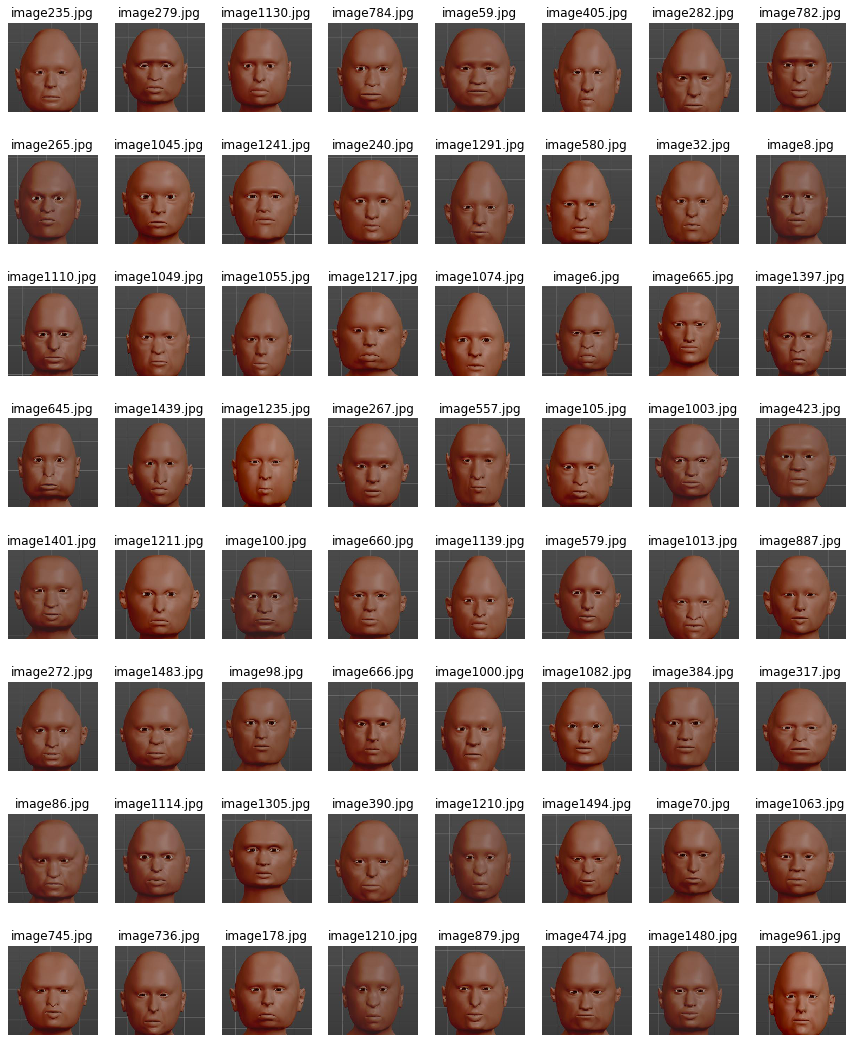

In [5]:
cols = 8
rows = 8
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, NUM_OF_SAMPLE)
        file_output='C:\\Users\\User\\itseez3d\\test\\dataset\\image'+str(random_index)+'.jpg'
        img=load_img(file_output)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(img)
        ax.set_title('image'+str(random_index)+'.jpg')
plt.show()

In [6]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
img=load_img('C:\\Users\\User\\itseez3d\\test\\dataset\\image0.jpg')
img_array = img_to_array(img)
img_array.shape

(256, 256, 3)

In [7]:
y=np.zeros((NUM_OF_SAMPLE,*img_array.shape))
for i in range(NUM_OF_SAMPLE):
    filename='C:\\Users\\User\\itseez3d\\test\\dataset\\image'+str(i)+'.jpg'
    img=load_img(filename)
    img_array=img_to_array(img)
    y[i]=img_array

In [8]:
features=[]
with open('C:\\Users\\User\\itseez3d\\test\\dataset\\test0.mhm','r') as file:
    a='0'
    while(a[:8]!='modifier'):
        a=file.readline()
    while(a[:8]=='modifier'):
        s=a.split()
        features.append(s[0]+' '+s[1]+' ')
        a=file.readline()
num_features=len(features)

In [9]:
X=np.zeros((NUM_OF_SAMPLE,num_features))
for i in range(NUM_OF_SAMPLE):
    filename='C:\\Users\\User\\itseez3d\\test\\dataset\\test'+str(i)+'.mhm'
    with open(filename,'r') as file:
        while(a[:8]!='modifier'):
            a=file.readline()
        feature_idx=0
        while(a[:8]=='modifier'):
            s=a.split()
            X[i][feature_idx]=float(s[-1])
            feature_idx+=1
            a=file.readline()

In [10]:
X.shape,y.shape

((1500, 152), (1500, 256, 256, 3))

In [11]:
y.max()

255.0

In [12]:
y=y/255-0.5
y.max(),y.min()

(0.5, -0.5)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1425, 152), (75, 152), (1425, 256, 256, 3), (75, 256, 256, 3))

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout,Reshape,UpSampling2D,BatchNormalization
from keras.layers.advanced_activations import ReLU
from keras import optimizers
import keras
import keras_utils

In [15]:
def make_model():
    model=Sequential()
    model.add(Dense(256 * 4 * 4, activation="relu", input_dim=num_features))
    model.add(Reshape((4, 4, 256)))
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(32, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(3, kernel_size=4, padding="same"))
    model.add(Activation("tanh"))
    
    return model

In [16]:
# model=make_model()

In [117]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 4096)              884736    
_________________________________________________________________
leaky_re_lu_33 (LeakyReLU)   (None, 4096)              0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 4, 4, 256)         0         
_________________________________________________________________
up_sampling2d_86 (UpSampling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 8, 8, 256)         1048832   
_________________________________________________________________
batch_normalization_62 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (None, 8, 8, 256)       

In [18]:
INIT_LR = 1e-2
BATCH_SIZE = 8
EPOCHS = 2000
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** (epoch//50)
optimizer = optimizers.SGD(INIT_LR, 0.9)
model.compile(loss='mae',optimizer=optimizer, metrics=['mae'])

NameError: name 'model' is not defined

In [19]:
from keras_tqdm import TQDMNotebookCallback

In [ ]:
model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               TQDMNotebookCallback(),
               keras.callbacks.ModelCheckpoint('model2503.hdf5', monitor='val_loss', 
                                               verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=100)],
    validation_data=(X_test, y_test),
    shuffle=True,
    verbose=1,
    initial_epoch=0
)

In [ ]:
# X_pred.shape,y_pred.shape

In [ ]:
# y_pred=model.predict(X_train[0:1])

In [ ]:
# y_pred=(y_pred+0.5)*255

In [ ]:
# y_true=(y_train[0]+0.5)*255

In [ ]:
# img_pred=array_to_img(y_pred[0])
# img_true=array_to_img(y_true)

In [ ]:
# img_true.show()

In [ ]:
# img_pred.show()

In [ ]:
# y_pred=model.predict(X_test[0:1])
# y_pred=(y_pred+0.5)*255
# y_true=(y_test[0]+0.5)*255

In [ ]:
# img_pred=array_to_img(y_pred[0])
# img_true=array_to_img(y_true)

In [ ]:
# img_true.show()

In [ ]:
# img_pred.show()

In [ ]:
img = load_img('C:\\Users\\User\\1.jpg')
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

In [ ]:
img.show()

In [20]:
img=Image.open('C:\\Users\\User\\1.jpg')
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(1152, 648)


In [21]:
img=img.crop((0,0,256,256))

In [22]:
img.show()

In [23]:
print(img.size)

(256, 256)


In [49]:
X=np.random.normal(0,0.2,216)
X=X.reshape(1,-1)

In [50]:
y=img_to_array(img)
y=y.reshape(1,256,256,3)

In [51]:
y=y/255-0.5

In [52]:
X.shape,y.shape

((1, 216), (1, 256, 256, 3))

In [101]:
from keras.layers import LeakyReLU
def make_model1():
    model=Sequential()
    model.add(Dense(256 * 4 * 4, input_dim=216,use_bias=False))
    model.add(LeakyReLU(alpha=0.02))
    model.add(Reshape((4, 4, 256)))
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.02))
    model.add(UpSampling2D())
    model.add(Conv2D(256, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.02))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.02))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.02))
    model.add(UpSampling2D())
    model.add(Conv2D(32, kernel_size=4, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.02))
    model.add(UpSampling2D())
    model.add(Conv2D(3, kernel_size=4, padding="same"))
    model.add(Activation("tanh"))
    
    return model

In [111]:
model=make_model1()
INIT_LR = 1e-2
BATCH_SIZE = 2
EPOCHS = 2000
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** (epoch//50)
# optimizer = optimizers.SGD(INIT_LR, 0.9)
optimizer = optimizers.Adam(INIT_LR)
model.compile(loss='mae',optimizer=optimizer, metrics=['mae'])

In [112]:
model.fit(
    X, y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               TQDMNotebookCallback()],
#     validation_data=(X_test, y_test),
    shuffle=True,
    verbose=1,
    initial_epoch=0
)

Epoch 1/2000


1/1 [==============================] - 1s 1s/step - loss: 0.5050 - mae: 0.5050
Epoch 2/2000


1/1 [==============================] - 0s 341ms/step - loss: 0.5762 - mae: 0.5762
Epoch 3/2000


1/1 [==============================] - 0s 443ms/step - loss: 0.4625 - mae: 0.4625
Epoch 4/2000


1/1 [==============================] - 3s 3s/step - loss: 0.4389 - mae: 0.4389
Epoch 5/2000


1/1 [==============================] - 2s 2s/step - loss: 0.3546 - mae: 0.3546
Epoch 6/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.3356 - mae: 0.3356
Epoch 7/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.3343 - mae: 0.3343
Epoch 8/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.3039 - mae: 0.3039
Epoch 9/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.2808 - mae: 0.2808
Epoch 10/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.2679 - mae: 0.2679
Epoch 11/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.2470 - mae: 0.2470
Epoch 12/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.2346 - mae: 0.2346
Epoch 13/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.2135 - mae: 0.2135
Epoch 14/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.2043 - mae: 0.2043
Epoch 15/2000


1/1 [==============================] - 1s 581ms/step - loss: 0.2154 - mae: 0.2154
Epoch 16/2000


1/1 [==============================] - 1s 591ms/step - loss: 0.1875 - mae: 0.1875
Epoch 17/2000


1/1 [==============================] - 1s 595ms/step - loss: 0.1937 - mae: 0.1937
Epoch 18/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.1858 - mae: 0.1858
Epoch 19/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.1846 - mae: 0.1846
Epoch 20/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.1809 - mae: 0.1809
Epoch 21/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.1743 - mae: 0.1743
Epoch 22/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.1686 - mae: 0.1686
Epoch 23/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.1643 - mae: 0.1643
Epoch 24/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.1624 - mae: 0.1624
Epoch 25/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.1564 - mae: 0.1564
Epoch 26/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.1515 - mae: 0.1515
Epoch 27/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.1488 - mae: 0.1488
Epoch 28/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.1443 - mae: 0.1443
Epoch 29/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.1401 - mae: 0.1401
Epoch 30/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.1360 - mae: 0.1360
Epoch 31/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.1328 - mae: 0.1328
Epoch 32/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.1291 - mae: 0.1291
Epoch 33/2000


1/1 [==============================] - 0s 313ms/step - loss: 0.1264 - mae: 0.1264
Epoch 34/2000


1/1 [==============================] - 0s 312ms/step - loss: 0.1237 - mae: 0.1237
Epoch 35/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.1215 - mae: 0.1215
Epoch 36/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.1179 - mae: 0.1179
Epoch 37/2000


1/1 [==============================] - 0s 302ms/step - loss: 0.1151 - mae: 0.1151
Epoch 38/2000


1/1 [==============================] - 0s 322ms/step - loss: 0.1124 - mae: 0.1124
Epoch 39/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.1107 - mae: 0.1107
Epoch 40/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.1118 - mae: 0.1118
Epoch 41/2000


1/1 [==============================] - 0s 325ms/step - loss: 0.1057 - mae: 0.1057
Epoch 42/2000


1/1 [==============================] - 0s 312ms/step - loss: 0.1030 - mae: 0.1030
Epoch 43/2000


1/1 [==============================] - 0s 327ms/step - loss: 0.1014 - mae: 0.1014
Epoch 44/2000


1/1 [==============================] - 0s 313ms/step - loss: 0.1011 - mae: 0.1011
Epoch 45/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.1005 - mae: 0.1005
Epoch 46/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0982 - mae: 0.0982
Epoch 47/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0944 - mae: 0.0944
Epoch 48/2000


1/1 [==============================] - 1s 819ms/step - loss: 0.0922 - mae: 0.0922
Epoch 49/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0911 - mae: 0.0911
Epoch 50/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0900 - mae: 0.0900
Epoch 51/2000


1/1 [==============================] - 1s 605ms/step - loss: 0.0896 - mae: 0.0896
Epoch 52/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0912 - mae: 0.0912
Epoch 53/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0920 - mae: 0.0920
Epoch 54/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0865 - mae: 0.0865
Epoch 55/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0866 - mae: 0.0866
Epoch 56/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0887 - mae: 0.0887
Epoch 57/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0861 - mae: 0.0861
Epoch 58/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0820 - mae: 0.0820
Epoch 59/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0838 - mae: 0.0838
Epoch 60/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0863 - mae: 0.0863
Epoch 61/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0814 - mae: 0.0814
Epoch 62/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0823 - mae: 0.0823
Epoch 63/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0820 - mae: 0.0820
Epoch 64/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0798 - mae: 0.0798
Epoch 65/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0798 - mae: 0.0798
Epoch 66/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0816 - mae: 0.0816
Epoch 67/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0773 - mae: 0.0773
Epoch 68/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0779 - mae: 0.0779
Epoch 69/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0765 - mae: 0.0765
Epoch 70/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0754 - mae: 0.0754
Epoch 71/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0760 - mae: 0.0760
Epoch 72/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0749 - mae: 0.0749
Epoch 73/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0799 - mae: 0.0799
Epoch 74/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0746 - mae: 0.0746
Epoch 75/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0744 - mae: 0.0744
Epoch 76/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0750 - mae: 0.0750
Epoch 77/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0742 - mae: 0.0742
Epoch 78/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0747 - mae: 0.0747
Epoch 79/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0711 - mae: 0.0711
Epoch 80/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0728 - mae: 0.0728
Epoch 81/2000


1/1 [==============================] - 0s 321ms/step - loss: 0.0716 - mae: 0.0716
Epoch 82/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0706 - mae: 0.0706
Epoch 83/2000


1/1 [==============================] - 0s 297ms/step - loss: 0.0686 - mae: 0.0686
Epoch 84/2000


1/1 [==============================] - 0s 314ms/step - loss: 0.0693 - mae: 0.0693
Epoch 85/2000


1/1 [==============================] - 0s 335ms/step - loss: 0.0699 - mae: 0.0699
Epoch 86/2000


1/1 [==============================] - 0s 326ms/step - loss: 0.0705 - mae: 0.0705
Epoch 87/2000


1/1 [==============================] - 0s 315ms/step - loss: 0.0717 - mae: 0.0717
Epoch 88/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0677 - mae: 0.0677
Epoch 89/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0669 - mae: 0.0669
Epoch 90/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0666 - mae: 0.0666
Epoch 91/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0681 - mae: 0.0681
Epoch 92/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0694 - mae: 0.0694
Epoch 93/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0697 - mae: 0.0697
Epoch 94/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0668 - mae: 0.0668
Epoch 95/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0640 - mae: 0.0640
Epoch 96/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0631 - mae: 0.0631
Epoch 97/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0650 - mae: 0.0650
Epoch 98/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0662 - mae: 0.0662
Epoch 99/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0649 - mae: 0.0649
Epoch 100/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0625 - mae: 0.0625
Epoch 101/2000


1/1 [==============================] - 0s 499ms/step - loss: 0.0622 - mae: 0.0622
Epoch 102/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0619 - mae: 0.0619
Epoch 103/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0623 - mae: 0.0623
Epoch 104/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0596 - mae: 0.0596
Epoch 105/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0585 - mae: 0.0585
Epoch 106/2000


1/1 [==============================] - 0s 497ms/step - loss: 0.0605 - mae: 0.0605
Epoch 107/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0598 - mae: 0.0598
Epoch 108/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0631 - mae: 0.0631
Epoch 109/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0595 - mae: 0.0595
Epoch 110/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0579 - mae: 0.0579
Epoch 111/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0630 - mae: 0.0630
Epoch 112/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0594 - mae: 0.0594
Epoch 113/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0621 - mae: 0.0621
Epoch 114/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0614 - mae: 0.0614
Epoch 115/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0621 - mae: 0.0621
Epoch 116/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0620 - mae: 0.0620
Epoch 117/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0622 - mae: 0.0622
Epoch 118/2000


1/1 [==============================] - 0s 327ms/step - loss: 0.0594 - mae: 0.0594
Epoch 119/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0642 - mae: 0.0642
Epoch 120/2000


1/1 [==============================] - 0s 318ms/step - loss: 0.0577 - mae: 0.0577
Epoch 121/2000


1/1 [==============================] - 0s 299ms/step - loss: 0.0645 - mae: 0.0645
Epoch 122/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0618 - mae: 0.0618
Epoch 123/2000


1/1 [==============================] - 0s 301ms/step - loss: 0.0593 - mae: 0.0593
Epoch 124/2000


1/1 [==============================] - 0s 488ms/step - loss: 0.0618 - mae: 0.0618
Epoch 125/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0569 - mae: 0.0569
Epoch 126/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0595 - mae: 0.0595
Epoch 127/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0591 - mae: 0.0591
Epoch 128/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0555 - mae: 0.0555
Epoch 129/2000


1/1 [==============================] - 0s 498ms/step - loss: 0.0580 - mae: 0.0580
Epoch 130/2000


1/1 [==============================] - 1s 588ms/step - loss: 0.0579 - mae: 0.0579
Epoch 131/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0579 - mae: 0.0579
Epoch 132/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0572 - mae: 0.0572
Epoch 133/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0558 - mae: 0.0558
Epoch 134/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0544 - mae: 0.0544
Epoch 135/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0555 - mae: 0.0555
Epoch 136/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0528 - mae: 0.0528
Epoch 137/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0530 - mae: 0.0530
Epoch 138/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0526 - mae: 0.0526
Epoch 139/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0534 - mae: 0.0534
Epoch 140/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0591 - mae: 0.0591
Epoch 141/2000


1/1 [==============================] - 1s 576ms/step - loss: 0.0535 - mae: 0.0535
Epoch 142/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0532 - mae: 0.0532
Epoch 143/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0533 - mae: 0.0533
Epoch 144/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0598 - mae: 0.0598
Epoch 145/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0568 - mae: 0.0568
Epoch 146/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0533 - mae: 0.0533
Epoch 147/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0535 - mae: 0.0535
Epoch 148/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0515 - mae: 0.0515
Epoch 149/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0522 - mae: 0.0522
Epoch 150/2000


1/1 [==============================] - 0s 496ms/step - loss: 0.0519 - mae: 0.0519
Epoch 151/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0537 - mae: 0.0537
Epoch 152/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0598 - mae: 0.0598
Epoch 153/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0507 - mae: 0.0507
Epoch 154/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0524 - mae: 0.0524
Epoch 155/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0612 - mae: 0.0612
Epoch 156/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0519 - mae: 0.0519
Epoch 157/2000


1/1 [==============================] - 1s 580ms/step - loss: 0.0639 - mae: 0.0639
Epoch 158/2000


1/1 [==============================] - 1s 605ms/step - loss: 0.0562 - mae: 0.0562
Epoch 159/2000


1/1 [==============================] - 1s 587ms/step - loss: 0.0550 - mae: 0.0550
Epoch 160/2000


1/1 [==============================] - 1s 579ms/step - loss: 0.0593 - mae: 0.0593
Epoch 161/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0537 - mae: 0.0537
Epoch 162/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0595 - mae: 0.0595
Epoch 163/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0584 - mae: 0.0584
Epoch 164/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0569 - mae: 0.0569
Epoch 165/2000


1/1 [==============================] - 0s 498ms/step - loss: 0.0568 - mae: 0.0568
Epoch 166/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0541 - mae: 0.0541
Epoch 167/2000


1/1 [==============================] - 1s 503ms/step - loss: 0.0560 - mae: 0.0560
Epoch 168/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0554 - mae: 0.0554
Epoch 169/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0526 - mae: 0.0526
Epoch 170/2000


1/1 [==============================] - 1s 503ms/step - loss: 0.0525 - mae: 0.0525
Epoch 171/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0516 - mae: 0.0516
Epoch 172/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0533 - mae: 0.0533
Epoch 173/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0511 - mae: 0.0511
Epoch 174/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0563 - mae: 0.0563
Epoch 175/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0494 - mae: 0.0494
Epoch 176/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0534 - mae: 0.0534
Epoch 177/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0504 - mae: 0.0504
Epoch 178/2000


1/1 [==============================] - 0s 497ms/step - loss: 0.0496 - mae: 0.0496
Epoch 179/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0527 - mae: 0.0527
Epoch 180/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0481 - mae: 0.0481
Epoch 181/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0529 - mae: 0.0529
Epoch 182/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0493 - mae: 0.0493
Epoch 183/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0498 - mae: 0.0498
Epoch 184/2000


1/1 [==============================] - 0s 460ms/step - loss: 0.0497 - mae: 0.0497
Epoch 185/2000


1/1 [==============================] - 1s 816ms/step - loss: 0.0490 - mae: 0.0490
Epoch 186/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0489 - mae: 0.0489
Epoch 187/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0485 - mae: 0.0485
Epoch 188/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0491 - mae: 0.0491
Epoch 189/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0462 - mae: 0.0462
Epoch 190/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0500 - mae: 0.0500
Epoch 191/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0460 - mae: 0.0460
Epoch 192/2000


1/1 [==============================] - 0s 500ms/step - loss: 0.0475 - mae: 0.0475
Epoch 193/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0454 - mae: 0.0454
Epoch 194/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0470 - mae: 0.0470
Epoch 195/2000


1/1 [==============================] - 1s 578ms/step - loss: 0.0451 - mae: 0.0451
Epoch 196/2000


1/1 [==============================] - 1s 614ms/step - loss: 0.0453 - mae: 0.0453
Epoch 197/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0431 - mae: 0.0431
Epoch 198/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0455 - mae: 0.0455
Epoch 199/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0440 - mae: 0.0440
Epoch 200/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0444 - mae: 0.0444
Epoch 201/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0434 - mae: 0.0434
Epoch 202/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0438 - mae: 0.0438
Epoch 203/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0429 - mae: 0.0429
Epoch 204/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0433 - mae: 0.0433
Epoch 205/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0425 - mae: 0.0425
Epoch 206/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0421 - mae: 0.0421
Epoch 207/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0428 - mae: 0.0428
Epoch 208/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0433 - mae: 0.0433
Epoch 209/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0409 - mae: 0.0409
Epoch 210/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0407 - mae: 0.0407
Epoch 211/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0410 - mae: 0.0410
Epoch 212/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0420 - mae: 0.0420
Epoch 213/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0401 - mae: 0.0401
Epoch 214/2000


1/1 [==============================] - 0s 426ms/step - loss: 0.0420 - mae: 0.0420
Epoch 215/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0414 - mae: 0.0414
Epoch 216/2000


1/1 [==============================] - 0s 295ms/step - loss: 0.0412 - mae: 0.0412
Epoch 217/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0417 - mae: 0.0417
Epoch 218/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0411 - mae: 0.0411
Epoch 219/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0405 - mae: 0.0405
Epoch 220/2000


1/1 [==============================] - 1s 900ms/step - loss: 0.0417 - mae: 0.0417
Epoch 221/2000


1/1 [==============================] - 1s 501ms/step - loss: 0.0400 - mae: 0.0400
Epoch 222/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0422 - mae: 0.0422
Epoch 223/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0393 - mae: 0.0393
Epoch 224/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0421 - mae: 0.0421
Epoch 225/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0401 - mae: 0.0401
Epoch 226/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0431 - mae: 0.0431
Epoch 227/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0408 - mae: 0.0408
Epoch 228/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0409 - mae: 0.0409
Epoch 229/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0391 - mae: 0.0391
Epoch 230/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0415 - mae: 0.0415
Epoch 231/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0402 - mae: 0.0402
Epoch 232/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0418 - mae: 0.0418
Epoch 233/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0400 - mae: 0.0400
Epoch 234/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0387 - mae: 0.0387
Epoch 235/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0410 - mae: 0.0410
Epoch 236/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0386 - mae: 0.0386
Epoch 237/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0400 - mae: 0.0400
Epoch 238/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0417 - mae: 0.0417
Epoch 239/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0416 - mae: 0.0416
Epoch 240/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0382 - mae: 0.0382
Epoch 241/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0396 - mae: 0.0396
Epoch 242/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0382 - mae: 0.0382
Epoch 243/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0386 - mae: 0.0386
Epoch 244/2000


1/1 [==============================] - 1s 603ms/step - loss: 0.0385 - mae: 0.0385
Epoch 245/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0417 - mae: 0.0417
Epoch 246/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0381 - mae: 0.0381
Epoch 247/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0370 - mae: 0.0370
Epoch 248/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0381 - mae: 0.0381
Epoch 249/2000


1/1 [==============================] - 0s 492ms/step - loss: 0.0363 - mae: 0.0363
Epoch 250/2000


1/1 [==============================] - 0s 300ms/step - loss: 0.0369 - mae: 0.0369
Epoch 251/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0402 - mae: 0.0402
Epoch 252/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0372 - mae: 0.0372
Epoch 253/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0357 - mae: 0.0357
Epoch 254/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0367 - mae: 0.0367
Epoch 255/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0366 - mae: 0.0366
Epoch 256/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0348 - mae: 0.0348
Epoch 257/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0354 - mae: 0.0354
Epoch 258/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0377 - mae: 0.0377
Epoch 259/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0372 - mae: 0.0372
Epoch 260/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0356 - mae: 0.0356
Epoch 261/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0345 - mae: 0.0345
Epoch 262/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0339 - mae: 0.0339
Epoch 263/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0337 - mae: 0.0337
Epoch 264/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0347 - mae: 0.0347
Epoch 265/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0367 - mae: 0.0367
Epoch 266/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0352 - mae: 0.0352
Epoch 267/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0336 - mae: 0.0336
Epoch 268/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0335 - mae: 0.0335
Epoch 269/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0334 - mae: 0.0334
Epoch 270/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0360 - mae: 0.0360
Epoch 271/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0378 - mae: 0.0378
Epoch 272/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0356 - mae: 0.0356
Epoch 273/2000


1/1 [==============================] - 1s 578ms/step - loss: 0.0342 - mae: 0.0342
Epoch 274/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0333 - mae: 0.0333
Epoch 275/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0333 - mae: 0.0333
Epoch 276/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0338 - mae: 0.0338
Epoch 277/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0346 - mae: 0.0346
Epoch 278/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0350 - mae: 0.0350
Epoch 279/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0347 - mae: 0.0347
Epoch 280/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0337 - mae: 0.0337
Epoch 281/2000


1/1 [==============================] - 0s 340ms/step - loss: 0.0341 - mae: 0.0341
Epoch 282/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0339 - mae: 0.0339
Epoch 283/2000


1/1 [==============================] - 0s 425ms/step - loss: 0.0333 - mae: 0.0333
Epoch 284/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0347 - mae: 0.0347
Epoch 285/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0356 - mae: 0.0356
Epoch 286/2000


1/1 [==============================] - 1s 621ms/step - loss: 0.0359 - mae: 0.0359
Epoch 287/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0342 - mae: 0.0342
Epoch 288/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0329 - mae: 0.0329
Epoch 289/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0314 - mae: 0.0314
Epoch 290/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0327 - mae: 0.0327
Epoch 291/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0347 - mae: 0.0347
Epoch 292/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0350 - mae: 0.0350
Epoch 293/2000


1/1 [==============================] - 1s 505ms/step - loss: 0.0347 - mae: 0.0347
Epoch 294/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0328 - mae: 0.0328
Epoch 295/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0328 - mae: 0.0328
Epoch 296/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0321 - mae: 0.0321
Epoch 297/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0328 - mae: 0.0328
Epoch 298/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0335 - mae: 0.0335
Epoch 299/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0343 - mae: 0.0343
Epoch 300/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0326 - mae: 0.0326
Epoch 301/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0345 - mae: 0.0345
Epoch 302/2000


1/1 [==============================] - 1s 609ms/step - loss: 0.0317 - mae: 0.0317
Epoch 303/2000


1/1 [==============================] - 1s 612ms/step - loss: 0.0314 - mae: 0.0314
Epoch 304/2000


1/1 [==============================] - 1s 608ms/step - loss: 0.0325 - mae: 0.0325
Epoch 305/2000


1/1 [==============================] - 1s 674ms/step - loss: 0.0323 - mae: 0.0323
Epoch 306/2000


1/1 [==============================] - 1s 614ms/step - loss: 0.0320 - mae: 0.0320
Epoch 307/2000


1/1 [==============================] - 1s 627ms/step - loss: 0.0334 - mae: 0.0334
Epoch 308/2000


1/1 [==============================] - 1s 677ms/step - loss: 0.0314 - mae: 0.0314
Epoch 309/2000


1/1 [==============================] - 1s 644ms/step - loss: 0.0311 - mae: 0.0311
Epoch 310/2000


1/1 [==============================] - 1s 620ms/step - loss: 0.0319 - mae: 0.0319
Epoch 311/2000


1/1 [==============================] - 1s 661ms/step - loss: 0.0313 - mae: 0.0313
Epoch 312/2000


1/1 [==============================] - 1s 624ms/step - loss: 0.0327 - mae: 0.0327
Epoch 313/2000


1/1 [==============================] - 1s 601ms/step - loss: 0.0307 - mae: 0.0307
Epoch 314/2000


1/1 [==============================] - 1s 776ms/step - loss: 0.0311 - mae: 0.0311
Epoch 315/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0310 - mae: 0.0310
Epoch 316/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0304 - mae: 0.0304
Epoch 317/2000


1/1 [==============================] - 1s 573ms/step - loss: 0.0309 - mae: 0.0309
Epoch 318/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0316 - mae: 0.0316
Epoch 319/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0313 - mae: 0.0313
Epoch 320/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0318 - mae: 0.0318
Epoch 321/2000


1/1 [==============================] - 1s 618ms/step - loss: 0.0330 - mae: 0.0330
Epoch 322/2000


1/1 [==============================] - 1s 633ms/step - loss: 0.0319 - mae: 0.0319
Epoch 323/2000


1/1 [==============================] - 1s 621ms/step - loss: 0.0315 - mae: 0.0315
Epoch 324/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0305 - mae: 0.0305
Epoch 325/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0298 - mae: 0.0298
Epoch 326/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0296 - mae: 0.0296
Epoch 327/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0307 - mae: 0.0307
Epoch 328/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0321 - mae: 0.0321
Epoch 329/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0321 - mae: 0.0321
Epoch 330/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0303 - mae: 0.0303
Epoch 331/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0304 - mae: 0.0304
Epoch 332/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0300 - mae: 0.0300
Epoch 333/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0305 - mae: 0.0305
Epoch 334/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0302 - mae: 0.0302
Epoch 335/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0312 - mae: 0.0312
Epoch 336/2000


1/1 [==============================] - 1s 598ms/step - loss: 0.0303 - mae: 0.0303
Epoch 337/2000


1/1 [==============================] - 1s 595ms/step - loss: 0.0323 - mae: 0.0323
Epoch 338/2000


1/1 [==============================] - 1s 606ms/step - loss: 0.0302 - mae: 0.0302
Epoch 339/2000


1/1 [==============================] - 1s 590ms/step - loss: 0.0298 - mae: 0.0298
Epoch 340/2000


1/1 [==============================] - 1s 605ms/step - loss: 0.0309 - mae: 0.0309
Epoch 341/2000


1/1 [==============================] - 1s 594ms/step - loss: 0.0308 - mae: 0.0308
Epoch 342/2000


1/1 [==============================] - 1s 646ms/step - loss: 0.0312 - mae: 0.0312
Epoch 343/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0309 - mae: 0.0309
Epoch 344/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0303 - mae: 0.0303
Epoch 345/2000


1/1 [==============================] - 1s 614ms/step - loss: 0.0299 - mae: 0.0299
Epoch 346/2000


1/1 [==============================] - 1s 608ms/step - loss: 0.0295 - mae: 0.0295
Epoch 347/2000


1/1 [==============================] - 1s 606ms/step - loss: 0.0296 - mae: 0.0296
Epoch 348/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0290 - mae: 0.0290
Epoch 349/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0296 - mae: 0.0296
Epoch 350/2000


1/1 [==============================] - 1s 633ms/step - loss: 0.0297 - mae: 0.0297
Epoch 351/2000


1/1 [==============================] - 1s 617ms/step - loss: 0.0294 - mae: 0.0294
Epoch 352/2000


1/1 [==============================] - 1s 608ms/step - loss: 0.0291 - mae: 0.0291
Epoch 353/2000


1/1 [==============================] - 1s 594ms/step - loss: 0.0292 - mae: 0.0292
Epoch 354/2000


1/1 [==============================] - 1s 632ms/step - loss: 0.0279 - mae: 0.0279
Epoch 355/2000


1/1 [==============================] - 1s 644ms/step - loss: 0.0280 - mae: 0.0280
Epoch 356/2000


1/1 [==============================] - 1s 625ms/step - loss: 0.0276 - mae: 0.0276
Epoch 357/2000


1/1 [==============================] - 1s 621ms/step - loss: 0.0284 - mae: 0.0284
Epoch 358/2000


1/1 [==============================] - 1s 622ms/step - loss: 0.0283 - mae: 0.0283
Epoch 359/2000


1/1 [==============================] - 1s 602ms/step - loss: 0.0282 - mae: 0.0282
Epoch 360/2000


1/1 [==============================] - 1s 637ms/step - loss: 0.0282 - mae: 0.0282
Epoch 361/2000


1/1 [==============================] - 1s 622ms/step - loss: 0.0290 - mae: 0.0290
Epoch 362/2000


1/1 [==============================] - 1s 603ms/step - loss: 0.0288 - mae: 0.0288
Epoch 363/2000


1/1 [==============================] - 1s 615ms/step - loss: 0.0284 - mae: 0.0284
Epoch 364/2000


1/1 [==============================] - 1s 609ms/step - loss: 0.0285 - mae: 0.0285
Epoch 365/2000


1/1 [==============================] - 1s 607ms/step - loss: 0.0280 - mae: 0.0280
Epoch 366/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0281 - mae: 0.0281
Epoch 367/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0294 - mae: 0.0294
Epoch 368/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0280 - mae: 0.0280
Epoch 369/2000


1/1 [==============================] - 0s 435ms/step - loss: 0.0280 - mae: 0.0280
Epoch 370/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0283 - mae: 0.0283
Epoch 371/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0274 - mae: 0.0274
Epoch 372/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0275 - mae: 0.0275
Epoch 373/2000


1/1 [==============================] - 1s 661ms/step - loss: 0.0281 - mae: 0.0281
Epoch 374/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0284 - mae: 0.0284
Epoch 375/2000


1/1 [==============================] - 1s 600ms/step - loss: 0.0263 - mae: 0.0263
Epoch 376/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0278 - mae: 0.0278
Epoch 377/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0286 - mae: 0.0286
Epoch 378/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0291 - mae: 0.0291
Epoch 379/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0301 - mae: 0.0301
Epoch 380/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0274 - mae: 0.0274
Epoch 381/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0276 - mae: 0.0276
Epoch 382/2000


1/1 [==============================] - 1s 571ms/step - loss: 0.0281 - mae: 0.0281
Epoch 383/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0275 - mae: 0.0275
Epoch 384/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0275 - mae: 0.0275
Epoch 385/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0286 - mae: 0.0286
Epoch 386/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0266 - mae: 0.0266
Epoch 387/2000


1/1 [==============================] - 1s 570ms/step - loss: 0.0271 - mae: 0.0271
Epoch 388/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0279 - mae: 0.0279
Epoch 389/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0276 - mae: 0.0276
Epoch 390/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0276 - mae: 0.0276
Epoch 391/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0286 - mae: 0.0286
Epoch 392/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0276 - mae: 0.0276
Epoch 393/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0272 - mae: 0.0272
Epoch 394/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0290 - mae: 0.0290
Epoch 395/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0294 - mae: 0.0294
Epoch 396/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0277 - mae: 0.0277
Epoch 397/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0271 - mae: 0.0271
Epoch 398/2000


1/1 [==============================] - 0s 397ms/step - loss: 0.0271 - mae: 0.0271
Epoch 399/2000


1/1 [==============================] - 0s 492ms/step - loss: 0.0272 - mae: 0.0272
Epoch 400/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0270 - mae: 0.0270
Epoch 401/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0273 - mae: 0.0273
Epoch 402/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0264 - mae: 0.0264
Epoch 403/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0268 - mae: 0.0268
Epoch 404/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0280 - mae: 0.0280
Epoch 405/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0275 - mae: 0.0275
Epoch 406/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0258 - mae: 0.0258
Epoch 407/2000


1/1 [==============================] - 0s 497ms/step - loss: 0.0262 - mae: 0.0262
Epoch 408/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0260 - mae: 0.0260
Epoch 409/2000


1/1 [==============================] - 1s 585ms/step - loss: 0.0267 - mae: 0.0267
Epoch 410/2000


1/1 [==============================] - 1s 582ms/step - loss: 0.0258 - mae: 0.0258
Epoch 411/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0273 - mae: 0.0273
Epoch 412/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0269 - mae: 0.0269
Epoch 413/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0254 - mae: 0.0254
Epoch 414/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0259 - mae: 0.0259
Epoch 415/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0266 - mae: 0.0266
Epoch 416/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0260 - mae: 0.0260
Epoch 417/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0255 - mae: 0.0255
Epoch 418/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0250 - mae: 0.0250
Epoch 419/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0261 - mae: 0.0261
Epoch 420/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0270 - mae: 0.0270
Epoch 421/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0253 - mae: 0.0253
Epoch 422/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0243 - mae: 0.0243
Epoch 423/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0249 - mae: 0.0249
Epoch 424/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0245 - mae: 0.0245
Epoch 425/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0258 - mae: 0.0258
Epoch 426/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0255 - mae: 0.0255
Epoch 427/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0254 - mae: 0.0254
Epoch 428/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0274 - mae: 0.0274
Epoch 429/2000


1/1 [==============================] - 0s 350ms/step - loss: 0.0262 - mae: 0.0262
Epoch 430/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0264 - mae: 0.0264
Epoch 431/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0270 - mae: 0.0270
Epoch 432/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0264 - mae: 0.0264
Epoch 433/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0259 - mae: 0.0259
Epoch 434/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0256 - mae: 0.0256
Epoch 435/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0266 - mae: 0.0266
Epoch 436/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0258 - mae: 0.0258
Epoch 437/2000


1/1 [==============================] - 1s 569ms/step - loss: 0.0263 - mae: 0.0263
Epoch 438/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0249 - mae: 0.0249
Epoch 439/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0256 - mae: 0.0256
Epoch 440/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0260 - mae: 0.0260
Epoch 441/2000


1/1 [==============================] - 1s 629ms/step - loss: 0.0259 - mae: 0.0259
Epoch 442/2000


1/1 [==============================] - 1s 645ms/step - loss: 0.0256 - mae: 0.0256
Epoch 443/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0273 - mae: 0.0273
Epoch 444/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0257 - mae: 0.0257
Epoch 445/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0273 - mae: 0.0273
Epoch 446/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0274 - mae: 0.0274
Epoch 447/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0253 - mae: 0.0253
Epoch 448/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0272 - mae: 0.0272
Epoch 449/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0262 - mae: 0.0262
Epoch 450/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0255 - mae: 0.0255
Epoch 451/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0276 - mae: 0.0276
Epoch 452/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0258 - mae: 0.0258
Epoch 453/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0252 - mae: 0.0252
Epoch 454/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0255 - mae: 0.0255
Epoch 455/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0254 - mae: 0.0254
Epoch 456/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0259 - mae: 0.0259
Epoch 457/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0254 - mae: 0.0254
Epoch 458/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0254 - mae: 0.0254
Epoch 459/2000


1/1 [==============================] - 0s 378ms/step - loss: 0.0242 - mae: 0.0242
Epoch 460/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0248 - mae: 0.0248
Epoch 461/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0239 - mae: 0.0239
Epoch 462/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0250 - mae: 0.0250
Epoch 463/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0242 - mae: 0.0242
Epoch 464/2000


1/1 [==============================] - 1s 665ms/step - loss: 0.0254 - mae: 0.0254
Epoch 465/2000


1/1 [==============================] - 1s 672ms/step - loss: 0.0246 - mae: 0.0246
Epoch 466/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0258 - mae: 0.0258
Epoch 467/2000


1/1 [==============================] - 1s 609ms/step - loss: 0.0243 - mae: 0.0243
Epoch 468/2000


1/1 [==============================] - 1s 642ms/step - loss: 0.0242 - mae: 0.0242
Epoch 469/2000


1/1 [==============================] - 1s 696ms/step - loss: 0.0240 - mae: 0.0240
Epoch 470/2000


1/1 [==============================] - 1s 684ms/step - loss: 0.0245 - mae: 0.0245
Epoch 471/2000


1/1 [==============================] - 1s 668ms/step - loss: 0.0247 - mae: 0.0247
Epoch 472/2000


1/1 [==============================] - 1s 674ms/step - loss: 0.0251 - mae: 0.0251
Epoch 473/2000


1/1 [==============================] - 1s 653ms/step - loss: 0.0243 - mae: 0.0243
Epoch 474/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0238 - mae: 0.0238
Epoch 475/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0231 - mae: 0.0231
Epoch 476/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0234 - mae: 0.0234
Epoch 477/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0234 - mae: 0.0234
Epoch 478/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0241 - mae: 0.0241
Epoch 479/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0239 - mae: 0.0239
Epoch 480/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0243 - mae: 0.0243
Epoch 481/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0237 - mae: 0.0237
Epoch 482/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0231 - mae: 0.0231
Epoch 483/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0241 - mae: 0.0241
Epoch 484/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0237 - mae: 0.0237
Epoch 485/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0232 - mae: 0.0232
Epoch 486/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0245 - mae: 0.0245
Epoch 487/2000


1/1 [==============================] - 0s 498ms/step - loss: 0.0244 - mae: 0.0244
Epoch 488/2000


1/1 [==============================] - 0s 302ms/step - loss: 0.0237 - mae: 0.0237
Epoch 489/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0237 - mae: 0.0237
Epoch 490/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0239 - mae: 0.0239
Epoch 491/2000


1/1 [==============================] - 1s 576ms/step - loss: 0.0240 - mae: 0.0240
Epoch 492/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0250 - mae: 0.0250
Epoch 493/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0234 - mae: 0.0234
Epoch 494/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0235 - mae: 0.0235
Epoch 495/2000


1/1 [==============================] - 1s 569ms/step - loss: 0.0234 - mae: 0.0234
Epoch 496/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0234 - mae: 0.0234
Epoch 497/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0232 - mae: 0.0232
Epoch 498/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0241 - mae: 0.0241
Epoch 499/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0239 - mae: 0.0239
Epoch 500/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0233 - mae: 0.0233
Epoch 501/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0226 - mae: 0.0226
Epoch 502/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0224 - mae: 0.0224
Epoch 503/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0220 - mae: 0.0220
Epoch 504/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0222 - mae: 0.0222
Epoch 505/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0223 - mae: 0.0223
Epoch 506/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0235 - mae: 0.0235
Epoch 507/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0230 - mae: 0.0230
Epoch 508/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0231 - mae: 0.0231
Epoch 509/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0227 - mae: 0.0227
Epoch 510/2000


1/1 [==============================] - 0s 499ms/step - loss: 0.0227 - mae: 0.0227
Epoch 511/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0227 - mae: 0.0227
Epoch 512/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0229 - mae: 0.0229
Epoch 513/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0226 - mae: 0.0226
Epoch 514/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0227 - mae: 0.0227
Epoch 515/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0230 - mae: 0.0230
Epoch 516/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0226 - mae: 0.0226
Epoch 517/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0223 - mae: 0.0223
Epoch 518/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0222 - mae: 0.0222
Epoch 519/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0234 - mae: 0.0234
Epoch 520/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0226 - mae: 0.0226
Epoch 521/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0221 - mae: 0.0221
Epoch 522/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0227 - mae: 0.0227
Epoch 523/2000


1/1 [==============================] - 0s 364ms/step - loss: 0.0223 - mae: 0.0223
Epoch 524/2000


1/1 [==============================] - 0s 297ms/step - loss: 0.0224 - mae: 0.0224
Epoch 525/2000


1/1 [==============================] - 0s 298ms/step - loss: 0.0222 - mae: 0.0222
Epoch 526/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0231 - mae: 0.0231
Epoch 527/2000


1/1 [==============================] - 0s 358ms/step - loss: 0.0220 - mae: 0.0220
Epoch 528/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0226 - mae: 0.0226
Epoch 529/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0223 - mae: 0.0223
Epoch 530/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0217 - mae: 0.0217
Epoch 531/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0225 - mae: 0.0225
Epoch 532/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0220 - mae: 0.0220
Epoch 533/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0222 - mae: 0.0222
Epoch 534/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0227 - mae: 0.0227
Epoch 535/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0221 - mae: 0.0221
Epoch 536/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0221 - mae: 0.0221
Epoch 537/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0216 - mae: 0.0216
Epoch 538/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0217 - mae: 0.0217
Epoch 539/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0222 - mae: 0.0222
Epoch 540/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0230 - mae: 0.0230
Epoch 541/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0225 - mae: 0.0225
Epoch 542/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0219 - mae: 0.0219
Epoch 543/2000


1/1 [==============================] - 1s 592ms/step - loss: 0.0221 - mae: 0.0221
Epoch 544/2000


1/1 [==============================] - 1s 587ms/step - loss: 0.0216 - mae: 0.0216
Epoch 545/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0223 - mae: 0.0223
Epoch 546/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0228 - mae: 0.0228
Epoch 547/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0224 - mae: 0.0224
Epoch 548/2000


1/1 [==============================] - 1s 589ms/step - loss: 0.0231 - mae: 0.0231
Epoch 549/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0224 - mae: 0.0224
Epoch 550/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0227 - mae: 0.0227
Epoch 551/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0239 - mae: 0.0239
Epoch 552/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0222 - mae: 0.0222
Epoch 553/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0216 - mae: 0.0216
Epoch 554/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0221 - mae: 0.0221
Epoch 555/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0231 - mae: 0.0231
Epoch 556/2000


1/1 [==============================] - 0s 497ms/step - loss: 0.0223 - mae: 0.0223
Epoch 557/2000


1/1 [==============================] - 0s 495ms/step - loss: 0.0222 - mae: 0.0222
Epoch 558/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0220 - mae: 0.0220
Epoch 559/2000


1/1 [==============================] - 0s 450ms/step - loss: 0.0214 - mae: 0.0214
Epoch 560/2000


1/1 [==============================] - 0s 326ms/step - loss: 0.0213 - mae: 0.0213
Epoch 561/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0221 - mae: 0.0221
Epoch 562/2000


1/1 [==============================] - 0s 301ms/step - loss: 0.0215 - mae: 0.0215
Epoch 563/2000


1/1 [==============================] - 0s 297ms/step - loss: 0.0208 - mae: 0.0208
Epoch 564/2000


1/1 [==============================] - 0s 300ms/step - loss: 0.0211 - mae: 0.0211
Epoch 565/2000


1/1 [==============================] - 0s 299ms/step - loss: 0.0210 - mae: 0.0210
Epoch 566/2000


1/1 [==============================] - 0s 486ms/step - loss: 0.0213 - mae: 0.0213
Epoch 567/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0219 - mae: 0.0219
Epoch 568/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0219 - mae: 0.0219
Epoch 569/2000


1/1 [==============================] - 1s 999ms/step - loss: 0.0224 - mae: 0.0224
Epoch 570/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0222 - mae: 0.0222
Epoch 571/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0211 - mae: 0.0211
Epoch 572/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0214 - mae: 0.0214
Epoch 573/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0207 - mae: 0.0207
Epoch 574/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0211 - mae: 0.0211
Epoch 575/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0224 - mae: 0.0224
Epoch 576/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0210 - mae: 0.0210
Epoch 577/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0211 - mae: 0.0211
Epoch 578/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0213 - mae: 0.0213
Epoch 579/2000


1/1 [==============================] - 1s 503ms/step - loss: 0.0215 - mae: 0.0215
Epoch 580/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0223 - mae: 0.0223
Epoch 581/2000


1/1 [==============================] - 1s 501ms/step - loss: 0.0218 - mae: 0.0218
Epoch 582/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0212 - mae: 0.0212
Epoch 583/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0210 - mae: 0.0210
Epoch 584/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0211 - mae: 0.0211
Epoch 585/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0208 - mae: 0.0208
Epoch 586/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0204 - mae: 0.0204
Epoch 587/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0219 - mae: 0.0219
Epoch 588/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0225 - mae: 0.0225
Epoch 589/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0215 - mae: 0.0215
Epoch 590/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0216 - mae: 0.0216
Epoch 591/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0219 - mae: 0.0219
Epoch 592/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0218 - mae: 0.0218
Epoch 593/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0211 - mae: 0.0211
Epoch 594/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0209 - mae: 0.0209
Epoch 595/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0202 - mae: 0.0202
Epoch 596/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0204 - mae: 0.0204
Epoch 597/2000


1/1 [==============================] - 0s 354ms/step - loss: 0.0206 - mae: 0.0206
Epoch 598/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.0222 - mae: 0.0222
Epoch 599/2000


1/1 [==============================] - 0s 467ms/step - loss: 0.0210 - mae: 0.0210
Epoch 600/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0212 - mae: 0.0212
Epoch 601/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0223 - mae: 0.0223
Epoch 602/2000


1/1 [==============================] - 1s 579ms/step - loss: 0.0204 - mae: 0.0204
Epoch 603/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0222 - mae: 0.0222
Epoch 604/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0204 - mae: 0.0204
Epoch 605/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0213 - mae: 0.0213
Epoch 606/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0214 - mae: 0.0214
Epoch 607/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0208 - mae: 0.0208
Epoch 608/2000


1/1 [==============================] - 1s 580ms/step - loss: 0.0205 - mae: 0.0205
Epoch 609/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0209 - mae: 0.0209
Epoch 610/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0205 - mae: 0.0205
Epoch 611/2000


1/1 [==============================] - 1s 621ms/step - loss: 0.0205 - mae: 0.0205
Epoch 612/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0202 - mae: 0.0202
Epoch 613/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0205 - mae: 0.0205
Epoch 614/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0208 - mae: 0.0208
Epoch 615/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0206 - mae: 0.0206
Epoch 616/2000


1/1 [==============================] - 1s 590ms/step - loss: 0.0201 - mae: 0.0201
Epoch 617/2000


1/1 [==============================] - 1s 585ms/step - loss: 0.0210 - mae: 0.0210
Epoch 618/2000


1/1 [==============================] - 1s 587ms/step - loss: 0.0208 - mae: 0.0208
Epoch 619/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0202 - mae: 0.0202
Epoch 620/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0203 - mae: 0.0203
Epoch 621/2000


1/1 [==============================] - 1s 573ms/step - loss: 0.0207 - mae: 0.0207
Epoch 622/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0202 - mae: 0.0202
Epoch 623/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0204 - mae: 0.0204
Epoch 624/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0205 - mae: 0.0205
Epoch 625/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0203 - mae: 0.0203
Epoch 626/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0199 - mae: 0.0199
Epoch 627/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0201 - mae: 0.0201
Epoch 628/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0201 - mae: 0.0201
Epoch 629/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0197 - mae: 0.0197
Epoch 630/2000


1/1 [==============================] - 0s 429ms/step - loss: 0.0199 - mae: 0.0199
Epoch 631/2000


1/1 [==============================] - 0s 327ms/step - loss: 0.0203 - mae: 0.0203
Epoch 632/2000


1/1 [==============================] - 0s 326ms/step - loss: 0.0199 - mae: 0.0199
Epoch 633/2000


1/1 [==============================] - 0s 389ms/step - loss: 0.0196 - mae: 0.0196
Epoch 634/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0199 - mae: 0.0199
Epoch 635/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0204 - mae: 0.0204
Epoch 636/2000


1/1 [==============================] - 1s 815ms/step - loss: 0.0204 - mae: 0.0204
Epoch 637/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0206 - mae: 0.0206
Epoch 638/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0198 - mae: 0.0198
Epoch 639/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0201 - mae: 0.0201
Epoch 640/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0203 - mae: 0.0203
Epoch 641/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0203 - mae: 0.0203
Epoch 642/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0203 - mae: 0.0203
Epoch 643/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0198 - mae: 0.0198
Epoch 644/2000


1/1 [==============================] - 1s 617ms/step - loss: 0.0200 - mae: 0.0200
Epoch 645/2000


1/1 [==============================] - 1s 580ms/step - loss: 0.0199 - mae: 0.0199
Epoch 646/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0197 - mae: 0.0197
Epoch 647/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0197 - mae: 0.0197
Epoch 648/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0199 - mae: 0.0199
Epoch 649/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0194 - mae: 0.0194
Epoch 650/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0198 - mae: 0.0198
Epoch 651/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0202 - mae: 0.0202
Epoch 652/2000


1/1 [==============================] - 1s 605ms/step - loss: 0.0195 - mae: 0.0195
Epoch 653/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0191 - mae: 0.0191
Epoch 654/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0192 - mae: 0.0192
Epoch 655/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0191 - mae: 0.0191
Epoch 656/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0190 - mae: 0.0190
Epoch 657/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0192 - mae: 0.0192
Epoch 658/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0190 - mae: 0.0190
Epoch 659/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0193 - mae: 0.0193
Epoch 660/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0193 - mae: 0.0193
Epoch 661/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0192 - mae: 0.0192
Epoch 662/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0194 - mae: 0.0194
Epoch 663/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0191 - mae: 0.0191
Epoch 664/2000


1/1 [==============================] - 1s 501ms/step - loss: 0.0196 - mae: 0.0196
Epoch 665/2000


1/1 [==============================] - 0s 409ms/step - loss: 0.0189 - mae: 0.0189
Epoch 666/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0193 - mae: 0.0193
Epoch 667/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0193 - mae: 0.0193
Epoch 668/2000


1/1 [==============================] - 1s 641ms/step - loss: 0.0193 - mae: 0.0193
Epoch 669/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0194 - mae: 0.0194
Epoch 670/2000


1/1 [==============================] - 1s 637ms/step - loss: 0.0190 - mae: 0.0190
Epoch 671/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0192 - mae: 0.0192
Epoch 672/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0197 - mae: 0.0197
Epoch 673/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0192 - mae: 0.0192
Epoch 674/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0194 - mae: 0.0194
Epoch 675/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0190 - mae: 0.0190
Epoch 676/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0188 - mae: 0.0188
Epoch 677/2000


1/1 [==============================] - 1s 570ms/step - loss: 0.0189 - mae: 0.0189
Epoch 678/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0197 - mae: 0.0197
Epoch 679/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0195 - mae: 0.0195
Epoch 680/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0195 - mae: 0.0195
Epoch 681/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0194 - mae: 0.0194
Epoch 682/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0188 - mae: 0.0188
Epoch 683/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0188 - mae: 0.0188
Epoch 684/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0191 - mae: 0.0191
Epoch 685/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0190 - mae: 0.0190
Epoch 686/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0191 - mae: 0.0191
Epoch 687/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0189 - mae: 0.0189
Epoch 688/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0188 - mae: 0.0188
Epoch 689/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0190 - mae: 0.0190
Epoch 690/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0191 - mae: 0.0191
Epoch 691/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0193 - mae: 0.0193
Epoch 692/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0190 - mae: 0.0190
Epoch 693/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0190 - mae: 0.0190
Epoch 694/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0188 - mae: 0.0188
Epoch 695/2000


1/1 [==============================] - 0s 422ms/step - loss: 0.0191 - mae: 0.0191
Epoch 696/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0191 - mae: 0.0191
Epoch 697/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0188 - mae: 0.0188
Epoch 698/2000


1/1 [==============================] - 1s 977ms/step - loss: 0.0191 - mae: 0.0191
Epoch 699/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0191 - mae: 0.0191
Epoch 700/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0193 - mae: 0.0193
Epoch 701/2000


1/1 [==============================] - 1s 580ms/step - loss: 0.0189 - mae: 0.0189
Epoch 702/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0184 - mae: 0.0184
Epoch 703/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0182 - mae: 0.0182
Epoch 704/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0184 - mae: 0.0184
Epoch 705/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0182 - mae: 0.0182
Epoch 706/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0183 - mae: 0.0183
Epoch 707/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0182 - mae: 0.0182
Epoch 708/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0182 - mae: 0.0182
Epoch 709/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0184 - mae: 0.0184
Epoch 710/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0184 - mae: 0.0184
Epoch 711/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0179 - mae: 0.0179
Epoch 712/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0180 - mae: 0.0180
Epoch 713/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0180 - mae: 0.0180
Epoch 714/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0179 - mae: 0.0179
Epoch 715/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0179 - mae: 0.0179
Epoch 716/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0180 - mae: 0.0180
Epoch 717/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0181 - mae: 0.0181
Epoch 718/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0183 - mae: 0.0183
Epoch 719/2000


1/1 [==============================] - 1s 670ms/step - loss: 0.0181 - mae: 0.0181
Epoch 720/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0181 - mae: 0.0181
Epoch 721/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0178 - mae: 0.0178
Epoch 722/2000


1/1 [==============================] - 1s 587ms/step - loss: 0.0180 - mae: 0.0180
Epoch 723/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0180 - mae: 0.0180
Epoch 724/2000


1/1 [==============================] - 1s 580ms/step - loss: 0.0183 - mae: 0.0183
Epoch 725/2000


1/1 [==============================] - 0s 334ms/step - loss: 0.0182 - mae: 0.0182
Epoch 726/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0188 - mae: 0.0188
Epoch 727/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0187 - mae: 0.0187
Epoch 728/2000


1/1 [==============================] - 0s 298ms/step - loss: 0.0182 - mae: 0.0182
Epoch 729/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0184 - mae: 0.0184
Epoch 730/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0185 - mae: 0.0185
Epoch 731/2000


1/1 [==============================] - 0s 298ms/step - loss: 0.0185 - mae: 0.0185
Epoch 732/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0185 - mae: 0.0185
Epoch 733/2000


1/1 [==============================] - 1s 739ms/step - loss: 0.0180 - mae: 0.0180
Epoch 734/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0187 - mae: 0.0187
Epoch 735/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0189 - mae: 0.0189
Epoch 736/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0183 - mae: 0.0183
Epoch 737/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0184 - mae: 0.0184
Epoch 738/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0187 - mae: 0.0187
Epoch 739/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0181 - mae: 0.0181
Epoch 740/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0180 - mae: 0.0180
Epoch 741/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0178 - mae: 0.0178
Epoch 742/2000


1/1 [==============================] - 0s 496ms/step - loss: 0.0183 - mae: 0.0183
Epoch 743/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0179 - mae: 0.0179
Epoch 744/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0183 - mae: 0.0183
Epoch 745/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0187 - mae: 0.0187
Epoch 746/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0187 - mae: 0.0187
Epoch 747/2000


1/1 [==============================] - 1s 586ms/step - loss: 0.0182 - mae: 0.0182
Epoch 748/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0179 - mae: 0.0179
Epoch 749/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0175 - mae: 0.0175
Epoch 750/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0181 - mae: 0.0181
Epoch 751/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0182 - mae: 0.0182
Epoch 752/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0176 - mae: 0.0176
Epoch 753/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0176 - mae: 0.0176
Epoch 754/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0179 - mae: 0.0179
Epoch 755/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0175 - mae: 0.0175
Epoch 756/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0175 - mae: 0.0175
Epoch 757/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0176 - mae: 0.0176
Epoch 758/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0178 - mae: 0.0178
Epoch 759/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0179 - mae: 0.0179
Epoch 760/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0182 - mae: 0.0182
Epoch 761/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0179 - mae: 0.0179
Epoch 762/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0175 - mae: 0.0175
Epoch 763/2000


1/1 [==============================] - 0s 326ms/step - loss: 0.0176 - mae: 0.0176
Epoch 764/2000


1/1 [==============================] - 0s 481ms/step - loss: 0.0177 - mae: 0.0177
Epoch 765/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0175 - mae: 0.0175
Epoch 766/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0180 - mae: 0.0180
Epoch 767/2000


1/1 [==============================] - 1s 842ms/step - loss: 0.0180 - mae: 0.0180
Epoch 768/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0180 - mae: 0.0180
Epoch 769/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0177 - mae: 0.0177
Epoch 770/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0177 - mae: 0.0177
Epoch 771/2000


1/1 [==============================] - 1s 606ms/step - loss: 0.0175 - mae: 0.0175
Epoch 772/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0175 - mae: 0.0175
Epoch 773/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0175 - mae: 0.0175
Epoch 774/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0176 - mae: 0.0176
Epoch 775/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0172 - mae: 0.0172
Epoch 776/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0177 - mae: 0.0177
Epoch 777/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0180 - mae: 0.0180
Epoch 778/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0181 - mae: 0.0181
Epoch 779/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0179 - mae: 0.0179
Epoch 780/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0174 - mae: 0.0174
Epoch 781/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0175 - mae: 0.0175
Epoch 782/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0176 - mae: 0.0176
Epoch 783/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0173 - mae: 0.0173
Epoch 784/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0177 - mae: 0.0177
Epoch 785/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0177 - mae: 0.0177
Epoch 786/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0178 - mae: 0.0178
Epoch 787/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0179 - mae: 0.0179
Epoch 788/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0177 - mae: 0.0177
Epoch 789/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0176 - mae: 0.0176
Epoch 790/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0175 - mae: 0.0175
Epoch 791/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0173 - mae: 0.0173
Epoch 792/2000


1/1 [==============================] - 1s 609ms/step - loss: 0.0173 - mae: 0.0173
Epoch 793/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0174 - mae: 0.0174
Epoch 794/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0175 - mae: 0.0175
Epoch 795/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0176 - mae: 0.0176
Epoch 796/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0177 - mae: 0.0177
Epoch 797/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0175 - mae: 0.0175
Epoch 798/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0174 - mae: 0.0174
Epoch 799/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0172 - mae: 0.0172
Epoch 800/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0176 - mae: 0.0176
Epoch 801/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0176 - mae: 0.0176
Epoch 802/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0174 - mae: 0.0174
Epoch 803/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0170 - mae: 0.0170
Epoch 804/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0169 - mae: 0.0169
Epoch 805/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0168 - mae: 0.0168
Epoch 806/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0169 - mae: 0.0169
Epoch 807/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0171 - mae: 0.0171
Epoch 808/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0176 - mae: 0.0176
Epoch 809/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0172 - mae: 0.0172
Epoch 810/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0169 - mae: 0.0169
Epoch 811/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0169 - mae: 0.0169
Epoch 812/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0168 - mae: 0.0168
Epoch 813/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0170 - mae: 0.0170
Epoch 814/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0171 - mae: 0.0171
Epoch 815/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0173 - mae: 0.0173
Epoch 816/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0172 - mae: 0.0172
Epoch 817/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0170 - mae: 0.0170
Epoch 818/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0168 - mae: 0.0168
Epoch 819/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0168 - mae: 0.0168
Epoch 820/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0171 - mae: 0.0171
Epoch 821/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0170 - mae: 0.0170
Epoch 822/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0169 - mae: 0.0169
Epoch 823/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0169 - mae: 0.0169
Epoch 824/2000


1/1 [==============================] - 0s 318ms/step - loss: 0.0172 - mae: 0.0172
Epoch 825/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0171 - mae: 0.0171
Epoch 826/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0171 - mae: 0.0171
Epoch 827/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0170 - mae: 0.0170
Epoch 828/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0170 - mae: 0.0170
Epoch 829/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0168 - mae: 0.0168
Epoch 830/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0168 - mae: 0.0168
Epoch 831/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0168 - mae: 0.0168
Epoch 832/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0169 - mae: 0.0169
Epoch 833/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0170 - mae: 0.0170
Epoch 834/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0170 - mae: 0.0170
Epoch 835/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0172 - mae: 0.0172
Epoch 836/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0174 - mae: 0.0174
Epoch 837/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0173 - mae: 0.0173
Epoch 838/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0170 - mae: 0.0170
Epoch 839/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0167 - mae: 0.0167
Epoch 840/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0169 - mae: 0.0169
Epoch 841/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0169 - mae: 0.0169
Epoch 842/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0170 - mae: 0.0170
Epoch 843/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0168 - mae: 0.0168
Epoch 844/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0169 - mae: 0.0169
Epoch 845/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0170 - mae: 0.0170
Epoch 846/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0172 - mae: 0.0172
Epoch 847/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0169 - mae: 0.0169
Epoch 848/2000


1/1 [==============================] - 1s 683ms/step - loss: 0.0167 - mae: 0.0167
Epoch 849/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0170 - mae: 0.0170
Epoch 850/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0170 - mae: 0.0170
Epoch 851/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0170 - mae: 0.0170
Epoch 852/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0168 - mae: 0.0168
Epoch 853/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0164 - mae: 0.0164
Epoch 854/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0166 - mae: 0.0166
Epoch 855/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0165 - mae: 0.0165
Epoch 856/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0165 - mae: 0.0165
Epoch 857/2000


1/1 [==============================] - 1s 505ms/step - loss: 0.0165 - mae: 0.0165
Epoch 858/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0164 - mae: 0.0164
Epoch 859/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0165 - mae: 0.0165
Epoch 860/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0164 - mae: 0.0164
Epoch 861/2000


1/1 [==============================] - 1s 635ms/step - loss: 0.0164 - mae: 0.0164
Epoch 862/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0164 - mae: 0.0164
Epoch 863/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0164 - mae: 0.0164
Epoch 864/2000


1/1 [==============================] - 0s 391ms/step - loss: 0.0165 - mae: 0.0165
Epoch 865/2000


1/1 [==============================] - 0s 300ms/step - loss: 0.0165 - mae: 0.0165
Epoch 866/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0166 - mae: 0.0166
Epoch 867/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0164 - mae: 0.0164
Epoch 868/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0165 - mae: 0.0165
Epoch 869/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0162 - mae: 0.0162
Epoch 870/2000


1/1 [==============================] - 0s 360ms/step - loss: 0.0163 - mae: 0.0163
Epoch 871/2000


1/1 [==============================] - 1s 744ms/step - loss: 0.0163 - mae: 0.0163
Epoch 872/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0163 - mae: 0.0163
Epoch 873/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0163 - mae: 0.0163
Epoch 874/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0164 - mae: 0.0164
Epoch 875/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0163 - mae: 0.0163
Epoch 876/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0165 - mae: 0.0165
Epoch 877/2000


1/1 [==============================] - 1s 578ms/step - loss: 0.0165 - mae: 0.0165
Epoch 878/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0165 - mae: 0.0165
Epoch 879/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0166 - mae: 0.0166
Epoch 880/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0163 - mae: 0.0163
Epoch 881/2000


1/1 [==============================] - 1s 646ms/step - loss: 0.0164 - mae: 0.0164
Epoch 882/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0163 - mae: 0.0163
Epoch 883/2000


1/1 [==============================] - 0s 499ms/step - loss: 0.0164 - mae: 0.0164
Epoch 884/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0165 - mae: 0.0165
Epoch 885/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0165 - mae: 0.0165
Epoch 886/2000


1/1 [==============================] - 1s 573ms/step - loss: 0.0164 - mae: 0.0164
Epoch 887/2000


1/1 [==============================] - 1s 608ms/step - loss: 0.0163 - mae: 0.0163
Epoch 888/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0165 - mae: 0.0165
Epoch 889/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0169 - mae: 0.0169
Epoch 890/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0168 - mae: 0.0168
Epoch 891/2000


1/1 [==============================] - 0s 500ms/step - loss: 0.0165 - mae: 0.0165
Epoch 892/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0165 - mae: 0.0165
Epoch 893/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0164 - mae: 0.0164
Epoch 894/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0165 - mae: 0.0165
Epoch 895/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0163 - mae: 0.0163
Epoch 896/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0162 - mae: 0.0162
Epoch 897/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0161 - mae: 0.0161
Epoch 898/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0161 - mae: 0.0161
Epoch 899/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0163 - mae: 0.0163
Epoch 900/2000


1/1 [==============================] - 0s 438ms/step - loss: 0.0163 - mae: 0.0163
Epoch 901/2000


1/1 [==============================] - 1s 594ms/step - loss: 0.0162 - mae: 0.0162
Epoch 902/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0160 - mae: 0.0160
Epoch 903/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0159 - mae: 0.0159
Epoch 904/2000


1/1 [==============================] - 1s 828ms/step - loss: 0.0160 - mae: 0.0160
Epoch 905/2000


1/1 [==============================] - 0s 499ms/step - loss: 0.0160 - mae: 0.0160
Epoch 906/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0161 - mae: 0.0161
Epoch 907/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0160 - mae: 0.0160
Epoch 908/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0160 - mae: 0.0160
Epoch 909/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0161 - mae: 0.0161
Epoch 910/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0162 - mae: 0.0162
Epoch 911/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0162 - mae: 0.0162
Epoch 912/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0161 - mae: 0.0161
Epoch 913/2000


1/1 [==============================] - 0s 499ms/step - loss: 0.0160 - mae: 0.0160
Epoch 914/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0159 - mae: 0.0159
Epoch 915/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0159 - mae: 0.0159
Epoch 916/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0160 - mae: 0.0160
Epoch 917/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0160 - mae: 0.0160
Epoch 918/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0162 - mae: 0.0162
Epoch 919/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0163 - mae: 0.0163
Epoch 920/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0162 - mae: 0.0162
Epoch 921/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0160 - mae: 0.0160
Epoch 922/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0159 - mae: 0.0159
Epoch 923/2000


1/1 [==============================] - 1s 586ms/step - loss: 0.0159 - mae: 0.0159
Epoch 924/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0159 - mae: 0.0159
Epoch 925/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0160 - mae: 0.0160
Epoch 926/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0160 - mae: 0.0160
Epoch 927/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0161 - mae: 0.0161
Epoch 928/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0161 - mae: 0.0161
Epoch 929/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0160 - mae: 0.0160
Epoch 930/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0160 - mae: 0.0160
Epoch 931/2000


1/1 [==============================] - 0s 459ms/step - loss: 0.0160 - mae: 0.0160
Epoch 932/2000


1/1 [==============================] - 0s 351ms/step - loss: 0.0159 - mae: 0.0159
Epoch 933/2000


1/1 [==============================] - 0s 386ms/step - loss: 0.0158 - mae: 0.0158
Epoch 934/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0157 - mae: 0.0157
Epoch 935/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0158 - mae: 0.0158
Epoch 936/2000


1/1 [==============================] - 1s 689ms/step - loss: 0.0160 - mae: 0.0160
Epoch 937/2000


1/1 [==============================] - 1s 623ms/step - loss: 0.0160 - mae: 0.0160
Epoch 938/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0159 - mae: 0.0159
Epoch 939/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0160 - mae: 0.0160
Epoch 940/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0161 - mae: 0.0161
Epoch 941/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0161 - mae: 0.0161
Epoch 942/2000


1/1 [==============================] - 1s 597ms/step - loss: 0.0160 - mae: 0.0160
Epoch 943/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0160 - mae: 0.0160
Epoch 944/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0157 - mae: 0.0157
Epoch 945/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0157 - mae: 0.0157
Epoch 946/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0158 - mae: 0.0158
Epoch 947/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0162 - mae: 0.0162
Epoch 948/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0162 - mae: 0.0162
Epoch 949/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0159 - mae: 0.0159
Epoch 950/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0156 - mae: 0.0156
Epoch 951/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0156 - mae: 0.0156
Epoch 952/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0156 - mae: 0.0156
Epoch 953/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0155 - mae: 0.0155
Epoch 954/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0156 - mae: 0.0156
Epoch 955/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0156 - mae: 0.0156
Epoch 956/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0156 - mae: 0.0156
Epoch 957/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0156 - mae: 0.0156
Epoch 958/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0156 - mae: 0.0156
Epoch 959/2000


1/1 [==============================] - 1s 570ms/step - loss: 0.0156 - mae: 0.0156
Epoch 960/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0155 - mae: 0.0155
Epoch 961/2000


1/1 [==============================] - 1s 505ms/step - loss: 0.0154 - mae: 0.0154
Epoch 962/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0155 - mae: 0.0155
Epoch 963/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0155 - mae: 0.0155
Epoch 964/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0156 - mae: 0.0156
Epoch 965/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0157 - mae: 0.0157
Epoch 966/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0158 - mae: 0.0158
Epoch 967/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0157 - mae: 0.0157
Epoch 968/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0156 - mae: 0.0156
Epoch 969/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0155 - mae: 0.0155
Epoch 970/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0155 - mae: 0.0155
Epoch 971/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0155 - mae: 0.0155
Epoch 972/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0156 - mae: 0.0156
Epoch 973/2000


1/1 [==============================] - 1s 612ms/step - loss: 0.0156 - mae: 0.0156
Epoch 974/2000


1/1 [==============================] - 1s 597ms/step - loss: 0.0157 - mae: 0.0157
Epoch 975/2000


1/1 [==============================] - 1s 569ms/step - loss: 0.0156 - mae: 0.0156
Epoch 976/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0155 - mae: 0.0155
Epoch 977/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0155 - mae: 0.0155
Epoch 978/2000


1/1 [==============================] - 1s 503ms/step - loss: 0.0155 - mae: 0.0155
Epoch 979/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0155 - mae: 0.0155
Epoch 980/2000


1/1 [==============================] - 0s 498ms/step - loss: 0.0156 - mae: 0.0156
Epoch 981/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0156 - mae: 0.0156
Epoch 982/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0156 - mae: 0.0156
Epoch 983/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0156 - mae: 0.0156
Epoch 984/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0156 - mae: 0.0156
Epoch 985/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0155 - mae: 0.0155
Epoch 986/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0156 - mae: 0.0156
Epoch 987/2000


1/1 [==============================] - 1s 597ms/step - loss: 0.0155 - mae: 0.0155
Epoch 988/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0156 - mae: 0.0156
Epoch 989/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0155 - mae: 0.0155
Epoch 990/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0156 - mae: 0.0156
Epoch 991/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0156 - mae: 0.0156
Epoch 992/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0157 - mae: 0.0157
Epoch 993/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0156 - mae: 0.0156
Epoch 994/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0156 - mae: 0.0156
Epoch 995/2000


1/1 [==============================] - 0s 468ms/step - loss: 0.0156 - mae: 0.0156
Epoch 996/2000


1/1 [==============================] - 0s 300ms/step - loss: 0.0157 - mae: 0.0157
Epoch 997/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0156 - mae: 0.0156
Epoch 998/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0155 - mae: 0.0155
Epoch 999/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0154 - mae: 0.0154
Epoch 1000/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0155 - mae: 0.0155
Epoch 1001/2000


1/1 [==============================] - 1s 971ms/step - loss: 0.0154 - mae: 0.0154
Epoch 1002/2000


1/1 [==============================] - 1s 597ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1003/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1004/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1005/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1006/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1007/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1008/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1009/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0154 - mae: 0.0154
Epoch 1010/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0154 - mae: 0.0154
Epoch 1011/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1012/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1013/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1014/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0150 - mae: 0.0150
Epoch 1015/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1016/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1017/2000


1/1 [==============================] - 1s 569ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1018/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1019/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1020/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1021/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1022/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1023/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1024/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1025/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1026/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1027/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1028/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1029/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1030/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1031/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0153 - mae: 0.0153
Epoch 1032/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0152 - mae: 0.0152
Epoch 1033/2000


1/1 [==============================] - 1s 876ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1034/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1035/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1036/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1037/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1038/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1039/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1040/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1041/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1042/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1043/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1044/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1045/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1046/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1047/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1048/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0153 - mae: 0.0153
Epoch 1049/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0152 - mae: 0.0152
Epoch 1050/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0151 - mae: 0.0151
Epoch 1051/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0150 - mae: 0.0150
Epoch 1052/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1053/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1054/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1055/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1056/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1057/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1058/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1059/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1060/2000


1/1 [==============================] - 0s 447ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1061/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1062/2000


1/1 [==============================] - 0s 404ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1063/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0149 - mae: 0.0149
Epoch 1064/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0149 - mae: 0.0149
Epoch 1065/2000


1/1 [==============================] - 1s 816ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1066/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1067/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1068/2000


1/1 [==============================] - 1s 571ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1069/2000


1/1 [==============================] - 1s 603ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1070/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1071/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1072/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1073/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1074/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1075/2000


1/1 [==============================] - 1s 631ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1076/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1077/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1078/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1079/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1080/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1081/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1082/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1083/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1084/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1085/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1086/2000


1/1 [==============================] - 1s 587ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1087/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1088/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1089/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1090/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1091/2000


1/1 [==============================] - 0s 305ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1092/2000


1/1 [==============================] - 1s 795ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1093/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0148 - mae: 0.0148
Epoch 1094/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0148 - mae: 0.0148
Epoch 1095/2000


1/1 [==============================] - 1s 629ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1096/2000


1/1 [==============================] - 1s 592ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1097/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1098/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1099/2000


1/1 [==============================] - 1s 588ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1100/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0149 - mae: 0.0149
Epoch 1101/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0148 - mae: 0.0148
Epoch 1102/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1103/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1104/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1105/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1106/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1107/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1108/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1109/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1110/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1111/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1112/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1113/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1114/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1115/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1116/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1117/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1118/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1119/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1120/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1121/2000


1/1 [==============================] - 0s 338ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1122/2000


1/1 [==============================] - 0s 331ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1123/2000


1/1 [==============================] - 0s 337ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1124/2000


1/1 [==============================] - 0s 329ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1125/2000


1/1 [==============================] - 1s 953ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1126/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0146 - mae: 0.0146
Epoch 1127/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0146 - mae: 0.0146
Epoch 1128/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1129/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1130/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1131/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1132/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1133/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1134/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1135/2000


1/1 [==============================] - 1s 581ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1136/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1137/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1138/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1139/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1140/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1141/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1142/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1143/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1144/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1145/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1146/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1147/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1148/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1149/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1150/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1151/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0147 - mae: 0.0147
Epoch 1152/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0146 - mae: 0.0146
Epoch 1153/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1154/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1155/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1156/2000


1/1 [==============================] - 0s 344ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1157/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1158/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0144 - mae: 0.0144
Epoch 1159/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0144 - mae: 0.0144
Epoch 1160/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0144 - mae: 0.0144
Epoch 1161/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1162/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1163/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1164/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1165/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1166/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1167/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1168/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1169/2000


1/1 [==============================] - 1s 598ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1170/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1171/2000


1/1 [==============================] - 1s 687ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1172/2000


1/1 [==============================] - 1s 576ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1173/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1174/2000


1/1 [==============================] - 1s 603ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1175/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1176/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1177/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1178/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1179/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1180/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1181/2000


1/1 [==============================] - 0s 499ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1182/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1183/2000


1/1 [==============================] - 1s 644ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1184/2000


1/1 [==============================] - 1s 662ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1185/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1186/2000


1/1 [==============================] - 0s 404ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1187/2000


1/1 [==============================] - 0s 346ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1188/2000


1/1 [==============================] - 0s 327ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1189/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1190/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1191/2000


1/1 [==============================] - 0s 311ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1192/2000


1/1 [==============================] - 0s 313ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1193/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1194/2000


1/1 [==============================] - 0s 400ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1195/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0143 - mae: 0.0143
Epoch 1196/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0142 - mae: 0.0142
Epoch 1197/2000


1/1 [==============================] - 1s 769ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1198/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1199/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1200/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0145 - mae: 0.0145
Epoch 1201/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0144 - mae: 0.0144
Epoch 1202/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1203/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1204/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1205/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1206/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0143 - mae: 0.0143
Epoch 1207/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1208/2000


1/1 [==============================] - 1s 717ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1209/2000


1/1 [==============================] - 1s 796ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1210/2000


1/1 [==============================] - 1s 857ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1211/2000


1/1 [==============================] - 1s 894ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1212/2000


1/1 [==============================] - 1s 858ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1213/2000


1/1 [==============================] - 1s 837ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1214/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1215/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1216/2000


1/1 [==============================] - 1s 695ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1217/2000


1/1 [==============================] - 1s 614ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1218/2000


1/1 [==============================] - 1s 617ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1219/2000


1/1 [==============================] - 1s 599ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1220/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1221/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1222/2000


1/1 [==============================] - 0s 372ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1223/2000


1/1 [==============================] - 0s 314ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1224/2000


1/1 [==============================] - 0s 451ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1225/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0141 - mae: 0.0141
Epoch 1226/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0141 - mae: 0.0141
Epoch 1227/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0141 - mae: 0.0141
Epoch 1228/2000


1/1 [==============================] - 1s 600ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1229/2000


1/1 [==============================] - 1s 625ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1230/2000


1/1 [==============================] - 1s 614ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1231/2000


1/1 [==============================] - 1s 628ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1232/2000


1/1 [==============================] - 1s 648ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1233/2000


1/1 [==============================] - 1s 591ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1234/2000


1/1 [==============================] - 1s 669ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1235/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0142 - mae: 0.0142
Epoch 1236/2000


1/1 [==============================] - 1s 627ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1237/2000


1/1 [==============================] - 1s 620ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1238/2000


1/1 [==============================] - 1s 618ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1239/2000


1/1 [==============================] - 1s 587ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1240/2000


1/1 [==============================] - 1s 626ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1241/2000


1/1 [==============================] - 1s 630ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1242/2000


1/1 [==============================] - 1s 605ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1243/2000


1/1 [==============================] - 1s 576ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1244/2000


1/1 [==============================] - 1s 607ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1245/2000


1/1 [==============================] - 1s 600ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1246/2000


1/1 [==============================] - 1s 625ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1247/2000


1/1 [==============================] - 1s 639ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1248/2000


1/1 [==============================] - 1s 636ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1249/2000


1/1 [==============================] - 1s 578ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1250/2000


1/1 [==============================] - 0s 356ms/step - loss: 0.0141 - mae: 0.0141
Epoch 1251/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0140 - mae: 0.0140
Epoch 1252/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0140 - mae: 0.0140
Epoch 1253/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0140 - mae: 0.0140
Epoch 1254/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1255/2000


1/1 [==============================] - 1s 618ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1256/2000


1/1 [==============================] - 1s 637ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1257/2000


1/1 [==============================] - 1s 632ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1258/2000


1/1 [==============================] - 1s 610ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1259/2000


1/1 [==============================] - 1s 649ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1260/2000


1/1 [==============================] - 1s 740ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1261/2000


1/1 [==============================] - 1s 637ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1262/2000


1/1 [==============================] - 1s 621ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1263/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1264/2000


1/1 [==============================] - 1s 591ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1265/2000


1/1 [==============================] - 1s 599ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1266/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1267/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1268/2000


1/1 [==============================] - 1s 599ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1269/2000


1/1 [==============================] - 1s 724ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1270/2000


1/1 [==============================] - 1s 589ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1271/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1272/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1273/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1274/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1275/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1276/2000


1/1 [==============================] - 0s 479ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1277/2000


1/1 [==============================] - 0s 320ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1278/2000


1/1 [==============================] - 0s 339ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1279/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mae: 0.0139
Epoch 1280/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0139 - mae: 0.0139
Epoch 1281/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0139 - mae: 0.0139
Epoch 1282/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1283/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1284/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1285/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1286/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1287/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1288/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1289/2000


1/1 [==============================] - 1s 501ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1290/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1291/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1292/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1293/2000


1/1 [==============================] - 1s 597ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1294/2000


1/1 [==============================] - 1s 579ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1295/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1296/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1297/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0140 - mae: 0.0140
Epoch 1298/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1299/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0139 - mae: 0.0139
Epoch 1300/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1301/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1302/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1303/2000


1/1 [==============================] - 1s 599ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1304/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1305/2000


1/1 [==============================] - 1s 589ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1306/2000


1/1 [==============================] - 1s 656ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1307/2000


1/1 [==============================] - 0s 375ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1308/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1309/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0138 - mae: 0.0138
Epoch 1310/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0138 - mae: 0.0138
Epoch 1311/2000


1/1 [==============================] - 1s 618ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1312/2000


1/1 [==============================] - 1s 608ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1313/2000


1/1 [==============================] - 1s 607ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1314/2000


1/1 [==============================] - 1s 598ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1315/2000


1/1 [==============================] - 1s 610ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1316/2000


1/1 [==============================] - 1s 597ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1317/2000


1/1 [==============================] - 1s 598ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1318/2000


1/1 [==============================] - 1s 671ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1319/2000


1/1 [==============================] - 1s 634ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1320/2000


1/1 [==============================] - 1s 631ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1321/2000


1/1 [==============================] - 1s 595ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1322/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1323/2000


1/1 [==============================] - 1s 634ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1324/2000


1/1 [==============================] - 1s 614ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1325/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1326/2000


1/1 [==============================] - 1s 714ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1327/2000


1/1 [==============================] - 1s 679ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1328/2000


1/1 [==============================] - 1s 635ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1329/2000


1/1 [==============================] - 1s 649ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1330/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1331/2000


1/1 [==============================] - 1s 640ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1332/2000


1/1 [==============================] - 1s 633ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1333/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1334/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0137 - mae: 0.0137
Epoch 1335/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0137 - mae: 0.0137
Epoch 1336/2000


1/1 [==============================] - 1s 613ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1337/2000


1/1 [==============================] - 1s 591ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1338/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1339/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1340/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1341/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1342/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1343/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1344/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0138 - mae: 0.0138
Epoch 1345/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1346/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1347/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1348/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1349/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1350/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1351/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1352/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1353/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1354/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1355/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1356/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1357/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1358/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0137 - mae: 0.0137
Epoch 1359/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1360/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1361/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1362/2000


1/1 [==============================] - 0s 400ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1363/2000


1/1 [==============================] - 0s 421ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1364/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mae: 0.0136
Epoch 1365/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0136 - mae: 0.0136
Epoch 1366/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0136 - mae: 0.0136
Epoch 1367/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1368/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1369/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1370/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1371/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1372/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1373/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1374/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1375/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1376/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1377/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1378/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1379/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1380/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1381/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1382/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1383/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1384/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1385/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1386/2000


1/1 [==============================] - 1s 501ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1387/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1388/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1389/2000


1/1 [==============================] - 1s 502ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1390/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1391/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1392/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1393/2000


1/1 [==============================] - 0s 311ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1394/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1395/2000


1/1 [==============================] - 0s 312ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1396/2000


1/1 [==============================] - 0s 311ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1397/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1398/2000


1/1 [==============================] - 0s 297ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1399/2000


1/1 [==============================] - 0s 302ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1400/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1401/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0136 - mae: 0.0136
Epoch 1402/2000


1/1 [==============================] - 0s 322ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1403/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1404/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mae: 0.0135
Epoch 1405/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mae: 0.0135
Epoch 1406/2000


1/1 [==============================] - 1s 897ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1407/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1408/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1409/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1410/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1411/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1412/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1413/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1414/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1415/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1416/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1417/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1418/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1419/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1420/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1421/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1422/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1423/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1424/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1425/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1426/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1427/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1428/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1429/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1430/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1431/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1432/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1433/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1434/2000


1/1 [==============================] - 1s 505ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1435/2000


1/1 [==============================] - 0s 452ms/step - loss: 0.0135 - mae: 0.0135
Epoch 1436/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0135 - mae: 0.0135
Epoch 1437/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mae: 0.0134
Epoch 1438/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0134 - mae: 0.0134
Epoch 1439/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1440/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1441/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1442/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1443/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1444/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1445/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1446/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1447/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1448/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1449/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1450/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1451/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1452/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1453/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1454/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1455/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1456/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1457/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1458/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1459/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1460/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1461/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1462/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1463/2000


1/1 [==============================] - 1s 505ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1464/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1465/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1466/2000


1/1 [==============================] - 0s 302ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1467/2000


1/1 [==============================] - 0s 421ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1468/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mae: 0.0134
Epoch 1469/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0134 - mae: 0.0134
Epoch 1470/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0134 - mae: 0.0134
Epoch 1471/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1472/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1473/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0134 - mae: 0.0134
Epoch 1474/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1475/2000


1/1 [==============================] - 1s 582ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1476/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1477/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1478/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1479/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1480/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1481/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1482/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1483/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1484/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1485/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1486/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1487/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1488/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1489/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1490/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1491/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1492/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1493/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1494/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1495/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1496/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1497/2000


1/1 [==============================] - 0s 428ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1498/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1499/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1500/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1501/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1502/2000


1/1 [==============================] - 0s 473ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1503/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mae: 0.0133
Epoch 1504/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0133 - mae: 0.0133
Epoch 1505/2000


1/1 [==============================] - 1s 932ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1506/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1507/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1508/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1509/2000


1/1 [==============================] - 1s 505ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1510/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1511/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1512/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1513/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1514/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1515/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1516/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1517/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1518/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1519/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1520/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1521/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1522/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1523/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0133 - mae: 0.0133
Epoch 1524/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1525/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1526/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1527/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1528/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1529/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1530/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1531/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1532/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1533/2000


1/1 [==============================] - 0s 473ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1534/2000


1/1 [==============================] - 0s 311ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1535/2000


1/1 [==============================] - 0s 302ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1536/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1537/2000


1/1 [==============================] - 0s 299ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1538/2000


1/1 [==============================] - 0s 302ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1539/2000


1/1 [==============================] - 0s 301ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1540/2000


1/1 [==============================] - 0s 472ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1541/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0132 - mae: 0.0132
Epoch 1542/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0132 - mae: 0.0132
Epoch 1543/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0132 - mae: 0.0132
Epoch 1544/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1545/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1546/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1547/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1548/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1549/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1550/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1551/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1552/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1553/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1554/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1555/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1556/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1557/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1558/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1559/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1560/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1561/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1562/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1563/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1564/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1565/2000


1/1 [==============================] - 1s 506ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1566/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1567/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1568/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1569/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1570/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1571/2000


1/1 [==============================] - 0s 333ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1572/2000


1/1 [==============================] - 0s 358ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1573/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0132 - mae: 0.0132
Epoch 1574/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0132 - mae: 0.0132
Epoch 1575/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0132 - mae: 0.0132
Epoch 1576/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1577/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0132 - mae: 0.0132
Epoch 1578/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1579/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1580/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1581/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1582/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1583/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1584/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1585/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1586/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1587/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1588/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1589/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1590/2000


1/1 [==============================] - 1s 503ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1591/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1592/2000


1/1 [==============================] - 1s 526ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1593/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1594/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1595/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1596/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1597/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1598/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1599/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1600/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1601/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1602/2000


1/1 [==============================] - 0s 325ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1603/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1604/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1605/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1606/2000


1/1 [==============================] - 0s 314ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1607/2000


1/1 [==============================] - 0s 312ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1608/2000


1/1 [==============================] - 0s 320ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1609/2000


1/1 [==============================] - 0s 334ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1610/2000


1/1 [==============================] - 0s 323ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1611/2000


1/1 [==============================] - 0s 317ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1612/2000


1/1 [==============================] - 1s 672ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1613/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0131 - mae: 0.0131
Epoch 1614/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0131 - mae: 0.0131
Epoch 1615/2000


1/1 [==============================] - 1s 717ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1616/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1617/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1618/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1619/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1620/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1621/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1622/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1623/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1624/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1625/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1626/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1627/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1628/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1629/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1630/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1631/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1632/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1633/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1634/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1635/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1636/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1637/2000


1/1 [==============================] - 1s 586ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1638/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0131 - mae: 0.0131
Epoch 1639/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1640/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1641/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1642/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1643/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1644/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1645/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0130 - mae: 0.0130
Epoch 1646/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0130 - mae: 0.0130
Epoch 1647/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0130 - mae: 0.0130
Epoch 1648/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1649/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1650/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1651/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1652/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1653/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1654/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1655/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1656/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1657/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1658/2000


1/1 [==============================] - 1s 564ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1659/2000


1/1 [==============================] - 1s 584ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1660/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1661/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1662/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1663/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1664/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1665/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1666/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1667/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1668/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1669/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1670/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1671/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1672/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1673/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1674/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1675/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1676/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1677/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1678/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1679/2000


1/1 [==============================] - 0s 441ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1680/2000


1/1 [==============================] - 3s 3s/step - loss: 0.0130 - mae: 0.0130
Epoch 1681/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0130 - mae: 0.0130
Epoch 1682/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1683/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1684/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1685/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1686/2000


1/1 [==============================] - 1s 627ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1687/2000


1/1 [==============================] - 1s 546ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1688/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1689/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1690/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1691/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1692/2000


1/1 [==============================] - 1s 592ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1693/2000


1/1 [==============================] - 1s 629ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1694/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1695/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1696/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1697/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1698/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1699/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1700/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1701/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1702/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1703/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1704/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1705/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0130 - mae: 0.0130
Epoch 1706/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1707/2000


1/1 [==============================] - 1s 593ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1708/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1709/2000


1/1 [==============================] - 0s 439ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1710/2000


1/1 [==============================] - 0s 451ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1711/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0129 - mae: 0.0129
Epoch 1712/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0129 - mae: 0.0129
Epoch 1713/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1714/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1715/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1716/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1717/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1718/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1719/2000


1/1 [==============================] - 1s 570ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1720/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1721/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1722/2000


1/1 [==============================] - 1s 515ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1723/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1724/2000


1/1 [==============================] - 1s 544ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1725/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1726/2000


1/1 [==============================] - 1s 559ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1727/2000


1/1 [==============================] - 1s 539ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1728/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1729/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1730/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1731/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1732/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1733/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1734/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1735/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1736/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1737/2000


1/1 [==============================] - 1s 503ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1738/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1739/2000


1/1 [==============================] - 0s 440ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1740/2000


1/1 [==============================] - 0s 300ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1741/2000


1/1 [==============================] - 0s 312ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1742/2000


1/1 [==============================] - 0s 306ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1743/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1744/2000


1/1 [==============================] - 0s 307ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1745/2000


1/1 [==============================] - 1s 695ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1746/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0129 - mae: 0.0129
Epoch 1747/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0129 - mae: 0.0129
Epoch 1748/2000


1/1 [==============================] - 1s 912ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1749/2000


1/1 [==============================] - 1s 571ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1750/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1751/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1752/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1753/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1754/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1755/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1756/2000


1/1 [==============================] - 1s 554ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1757/2000


1/1 [==============================] - 1s 579ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1758/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1759/2000


1/1 [==============================] - 1s 576ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1760/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1761/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1762/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1763/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1764/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1765/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1766/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1767/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1768/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1769/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1770/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1771/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1772/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1773/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1774/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1775/2000


1/1 [==============================] - 0s 476ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1776/2000


1/1 [==============================] - 0s 313ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1777/2000


1/1 [==============================] - 0s 301ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1778/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1779/2000


1/1 [==============================] - 0s 311ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1780/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1781/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1782/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0129 - mae: 0.0129
Epoch 1783/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1784/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1785/2000


1/1 [==============================] - 0s 312ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1786/2000


1/1 [==============================] - 0s 319ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1787/2000


1/1 [==============================] - 0s 317ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1788/2000


1/1 [==============================] - 0s 311ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1789/2000


1/1 [==============================] - 0s 308ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1790/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1791/2000


1/1 [==============================] - 0s 324ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1792/2000


1/1 [==============================] - 0s 323ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1793/2000


1/1 [==============================] - 0s 334ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1794/2000


1/1 [==============================] - 0s 333ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1795/2000


1/1 [==============================] - 0s 348ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1796/2000


1/1 [==============================] - 0s 333ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1797/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0128 - mae: 0.0128
Epoch 1798/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0128
Epoch 1799/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0128
Epoch 1800/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1801/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1802/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1803/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1804/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1805/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1806/2000


1/1 [==============================] - 1s 530ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1807/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1808/2000


1/1 [==============================] - 1s 538ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1809/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1810/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1811/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1812/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1813/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1814/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1815/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1816/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1817/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1818/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1819/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1820/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1821/2000


1/1 [==============================] - 1s 582ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1822/2000


1/1 [==============================] - 1s 532ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1823/2000


1/1 [==============================] - 1s 529ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1824/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1825/2000


1/1 [==============================] - 1s 550ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1826/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1827/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1828/2000


1/1 [==============================] - 1s 534ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1829/2000


1/1 [==============================] - 0s 416ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1830/2000


1/1 [==============================] - 1s 623ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1831/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0128
Epoch 1832/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0128
Epoch 1833/2000


1/1 [==============================] - 1s 762ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1834/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1835/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1836/2000


1/1 [==============================] - 1s 525ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1837/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1838/2000


1/1 [==============================] - 1s 520ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1839/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1840/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1841/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1842/2000


1/1 [==============================] - 1s 657ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1843/2000


1/1 [==============================] - 1s 590ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1844/2000


1/1 [==============================] - 1s 547ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1845/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1846/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1847/2000


1/1 [==============================] - 1s 540ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1848/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1849/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1850/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1851/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1852/2000


1/1 [==============================] - 1s 508ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1853/2000


1/1 [==============================] - 1s 509ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1854/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1855/2000


1/1 [==============================] - 1s 511ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1856/2000


1/1 [==============================] - 1s 518ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1857/2000


1/1 [==============================] - 1s 571ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1858/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1859/2000


1/1 [==============================] - 0s 490ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1860/2000


1/1 [==============================] - 0s 309ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1861/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1862/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1863/2000


1/1 [==============================] - 0s 321ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1864/2000


1/1 [==============================] - 0s 322ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1865/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0128
Epoch 1866/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0128 - mae: 0.0128
Epoch 1867/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0128 - mae: 0.0128
Epoch 1868/2000


1/1 [==============================] - 1s 590ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1869/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1870/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0128 - mae: 0.0128
Epoch 1871/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1872/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1873/2000


1/1 [==============================] - 1s 545ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1874/2000


1/1 [==============================] - 1s 555ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1875/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1876/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1877/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1878/2000


1/1 [==============================] - 1s 537ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1879/2000


1/1 [==============================] - 1s 535ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1880/2000


1/1 [==============================] - 1s 514ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1881/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1882/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1883/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1884/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1885/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1886/2000


1/1 [==============================] - 1s 566ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1887/2000


1/1 [==============================] - 1s 615ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1888/2000


1/1 [==============================] - 1s 571ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1889/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1890/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1891/2000


1/1 [==============================] - 1s 542ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1892/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1893/2000


1/1 [==============================] - 1s 602ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1894/2000


1/1 [==============================] - 1s 643ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1895/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0127 - mae: 0.0127
Epoch 1896/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0127 - mae: 0.0127
Epoch 1897/2000


1/1 [==============================] - 1s 821ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1898/2000


1/1 [==============================] - 1s 531ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1899/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1900/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1901/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1902/2000


1/1 [==============================] - 1s 519ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1903/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1904/2000


1/1 [==============================] - 1s 630ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1905/2000


1/1 [==============================] - 1s 562ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1906/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1907/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1908/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1909/2000


1/1 [==============================] - 1s 568ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1910/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1911/2000


1/1 [==============================] - 1s 581ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1912/2000


1/1 [==============================] - 1s 512ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1913/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1914/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1915/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1916/2000


1/1 [==============================] - 1s 575ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1917/2000


1/1 [==============================] - 1s 553ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1918/2000


1/1 [==============================] - 1s 599ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1919/2000


1/1 [==============================] - 1s 596ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1920/2000


1/1 [==============================] - 1s 577ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1921/2000


1/1 [==============================] - 1s 583ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1922/2000


1/1 [==============================] - 1s 522ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1923/2000


1/1 [==============================] - 0s 490ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1924/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1925/2000


1/1 [==============================] - 0s 295ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1926/2000


1/1 [==============================] - 0s 304ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1927/2000


1/1 [==============================] - 0s 303ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1928/2000


1/1 [==============================] - 0s 317ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1929/2000


1/1 [==============================] - 0s 328ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1930/2000


1/1 [==============================] - 0s 321ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1931/2000


1/1 [==============================] - 0s 310ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1932/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0127 - mae: 0.0127
Epoch 1933/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0127 - mae: 0.0127
Epoch 1934/2000


1/1 [==============================] - 1s 1s/step - loss: 0.0127 - mae: 0.0127
Epoch 1935/2000


1/1 [==============================] - 1s 636ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1936/2000


1/1 [==============================] - 1s 808ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1937/2000


1/1 [==============================] - 1s 843ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1938/2000


1/1 [==============================] - 1s 838ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1939/2000


1/1 [==============================] - 1s 841ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1940/2000


1/1 [==============================] - 1s 890ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1941/2000


1/1 [==============================] - 1s 825ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1942/2000


1/1 [==============================] - 1s 611ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1943/2000


1/1 [==============================] - 1s 563ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1944/2000


1/1 [==============================] - 1s 556ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1945/2000


1/1 [==============================] - 1s 574ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1946/2000


1/1 [==============================] - 1s 628ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1947/2000


1/1 [==============================] - 1s 636ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1948/2000


1/1 [==============================] - 1s 565ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1949/2000


1/1 [==============================] - 1s 527ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1950/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1951/2000


1/1 [==============================] - 1s 543ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1952/2000


1/1 [==============================] - 1s 557ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1953/2000


1/1 [==============================] - 1s 652ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1954/2000


1/1 [==============================] - 1s 549ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1955/2000


1/1 [==============================] - 1s 651ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1956/2000


1/1 [==============================] - 0s 336ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1957/2000


1/1 [==============================] - 0s 429ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1958/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0127 - mae: 0.0127
Epoch 1959/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0127 - mae: 0.0127
Epoch 1960/2000


1/1 [==============================] - 1s 622ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1961/2000


1/1 [==============================] - 1s 551ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1962/2000


1/1 [==============================] - 1s 572ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1963/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1964/2000


1/1 [==============================] - 1s 588ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1965/2000


1/1 [==============================] - 1s 561ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1966/2000


1/1 [==============================] - 1s 560ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1967/2000


1/1 [==============================] - 1s 516ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1968/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1969/2000


1/1 [==============================] - 1s 524ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1970/2000


1/1 [==============================] - 1s 513ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1971/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1972/2000


1/1 [==============================] - 1s 588ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1973/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1974/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1975/2000


1/1 [==============================] - 1s 541ms/step - loss: 0.0127 - mae: 0.0127
Epoch 1976/2000


1/1 [==============================] - 1s 507ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1977/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1978/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1979/2000


1/1 [==============================] - 1s 521ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1980/2000


1/1 [==============================] - 0s 500ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1981/2000


1/1 [==============================] - 1s 504ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1982/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1983/2000


1/1 [==============================] - 1s 510ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1984/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1985/2000


1/1 [==============================] - 1s 517ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1986/2000


1/1 [==============================] - 0s 459ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1987/2000


1/1 [==============================] - 1s 659ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1988/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0126 - mae: 0.0126
Epoch 1989/2000


1/1 [==============================] - 2s 2s/step - loss: 0.0126 - mae: 0.0126
Epoch 1990/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1991/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1992/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1993/2000


1/1 [==============================] - 1s 567ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1994/2000


1/1 [==============================] - 1s 528ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1995/2000


1/1 [==============================] - 1s 536ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1996/2000


1/1 [==============================] - 1s 552ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1997/2000


1/1 [==============================] - 1s 523ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1998/2000


1/1 [==============================] - 1s 558ms/step - loss: 0.0126 - mae: 0.0126
Epoch 1999/2000


1/1 [==============================] - 1s 533ms/step - loss: 0.0126 - mae: 0.0126
Epoch 2000/2000


1/1 [==============================] - 1s 548ms/step - loss: 0.0126 - mae: 0.0126



In [104]:
y_pred=model.predict(X[0:1])
y_pred=(y_pred+0.5)*255
y_true=(y[0]+0.5)*255

In [105]:
img_pred=array_to_img(y_pred[0])
img_true=array_to_img(y_true)

In [1]:
img_true.show()

NameError: name 'img_true' is not defined

In [107]:
img_pred.show()

In [ ]:
im.show()

AttributeError: module 'tensorflow_core._api.v2.config' has no attribute 'experimental_list_devices'